In [3]:
import pandas as pd
A = pd.read_excel("C:/Users/Anoop Srivastava/Desktop/Data Science Stuff/Data Science notes/Projects discussed in class (Hackathon and others)/Project_main_ML/Attrition Case Study.xlsx")

In [4]:
A.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
# Below we are checking if there is any missing data

A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Below we are separating categorical and continuous columns

cat = []
con = []

for i in A.columns:
    if(A[i].dtypes=='object'):
        cat.append(str(i))
    else:
        con.append(str(i))

In [7]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [8]:
con

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

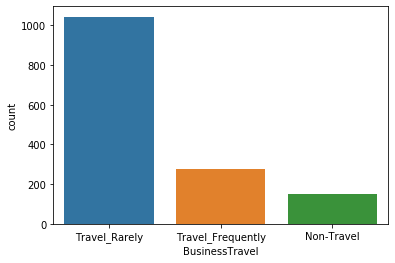

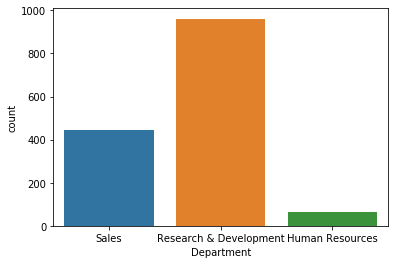

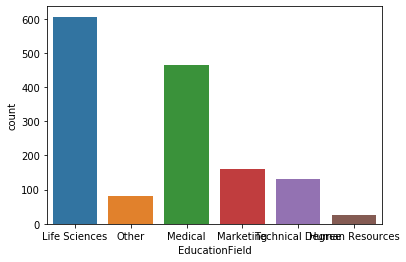

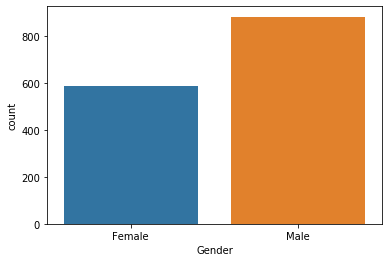

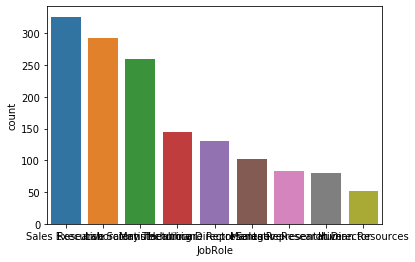

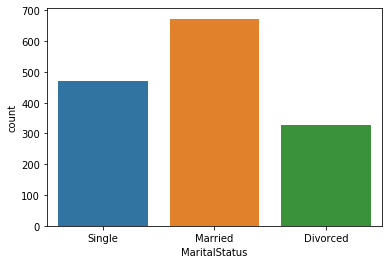

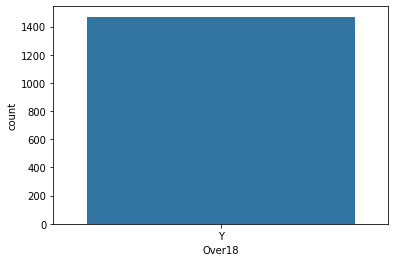

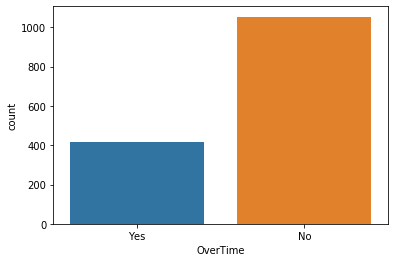

In [11]:
# Below we are checking distribution of data in categorical columns

for i in cat:
    sb.countplot(A[i])
    plt.show()

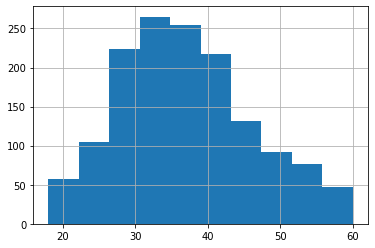

In [12]:
A.Age.hist()

# So by looking at below histogram it seems that we can divide the Age in 3 groups: 
# 19  --> 25 Junior
# 26  --> 40 Mid_exp
# 40+ -->    Senior

In [13]:
new_age = []

for i in A.Age:
    if (i<=25):
        new_age.append("Junior")
    elif(i<=40):
        new_age.append("Mid_exp")
    else:
        new_age.append("Senior")

In [14]:
A['Age_cat'] = new_age

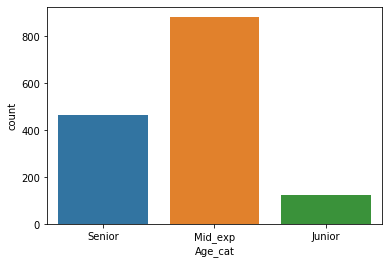

In [15]:
# Distribution of data in new age group 'new_age'

sb.countplot(A.Age_cat)

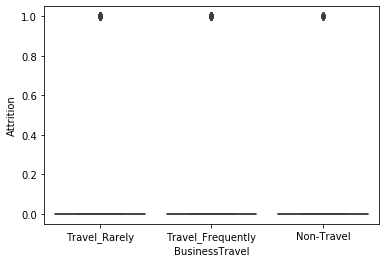

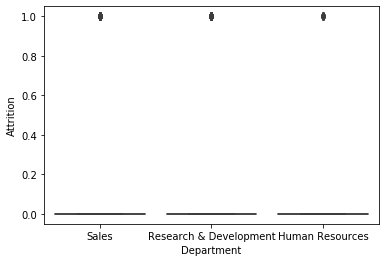

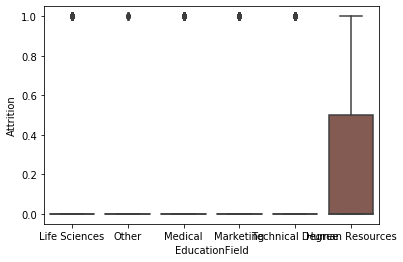

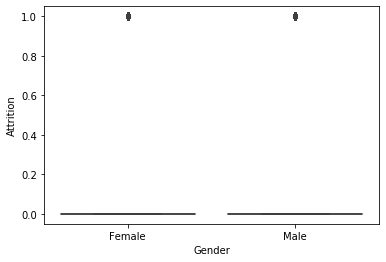

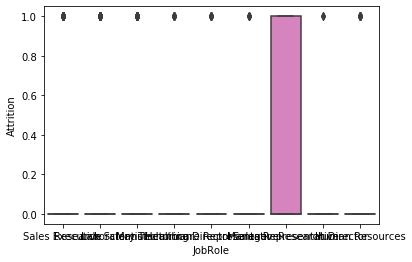

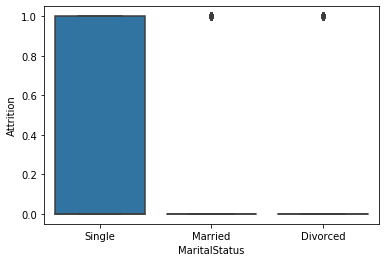

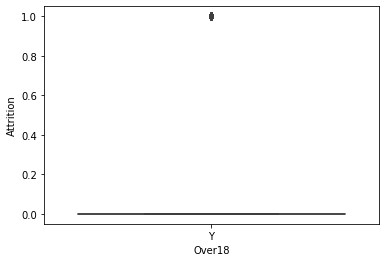

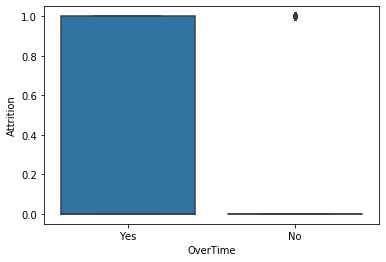

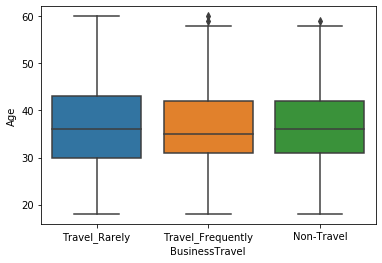

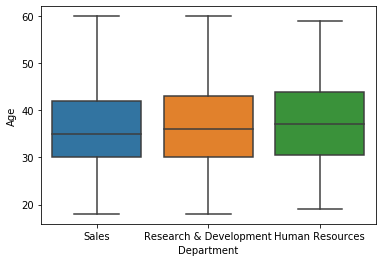

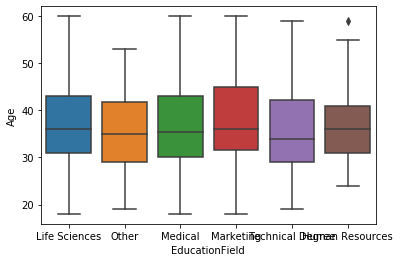

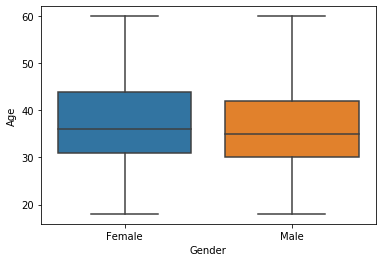

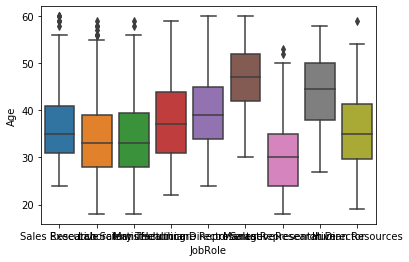

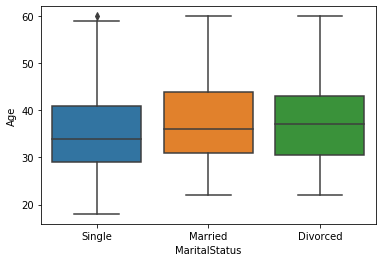

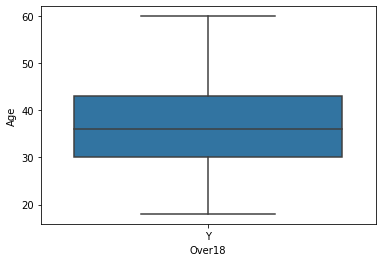

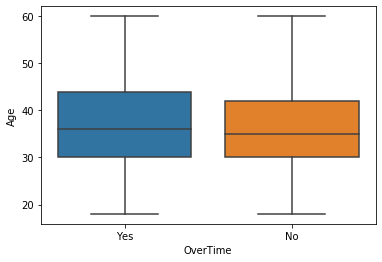

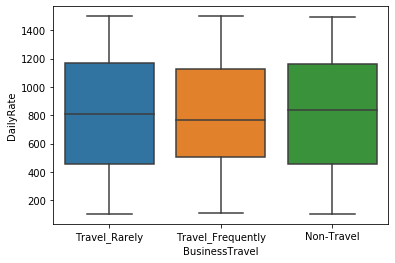

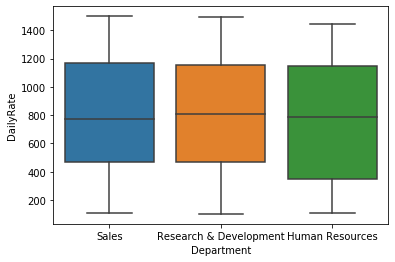

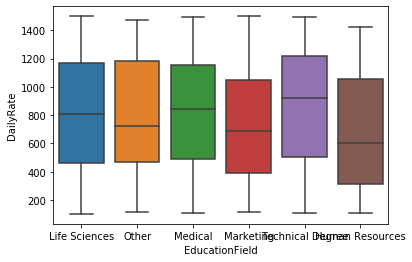

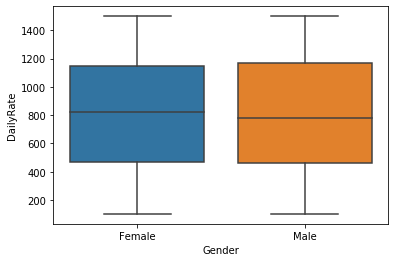

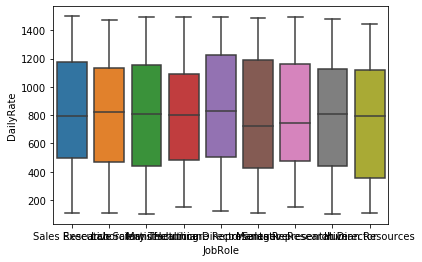

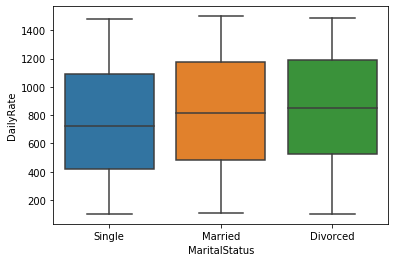

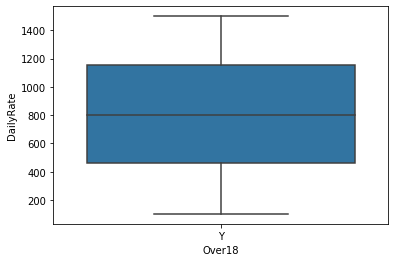

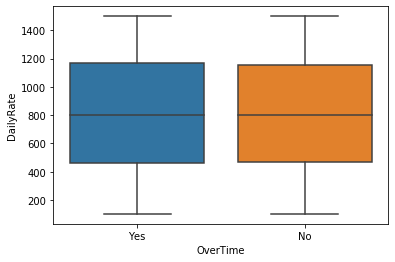

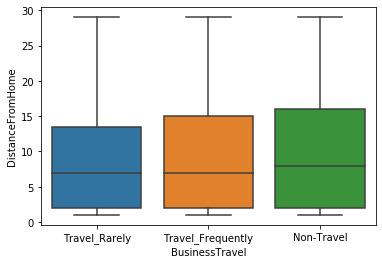

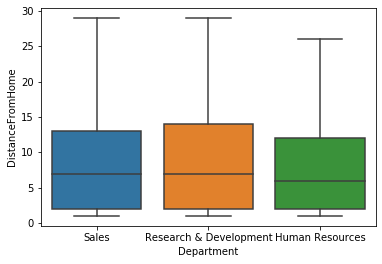

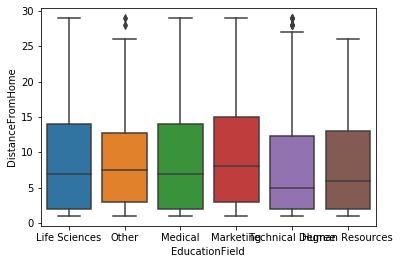

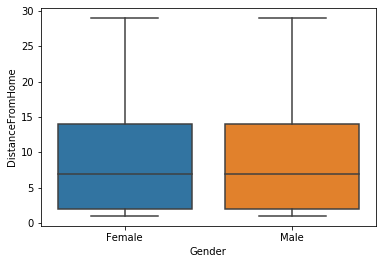

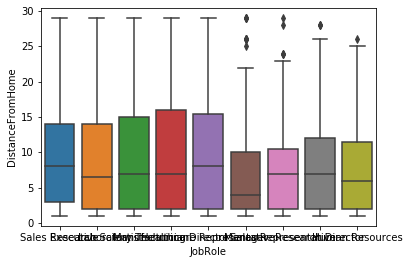

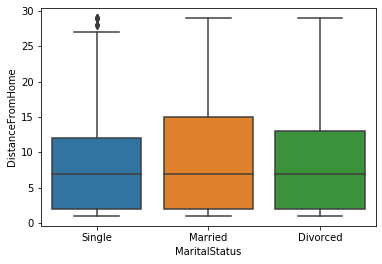

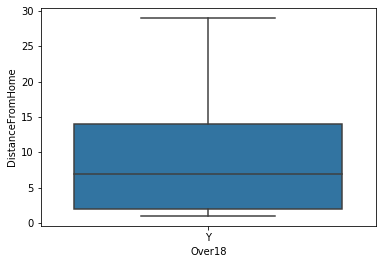

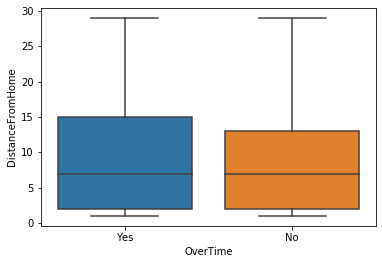

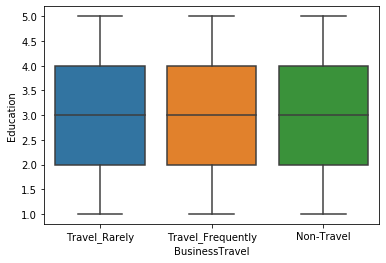

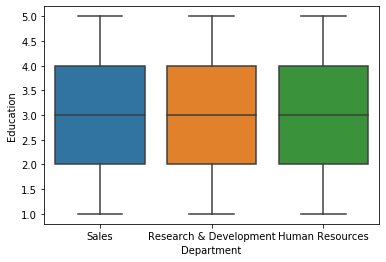

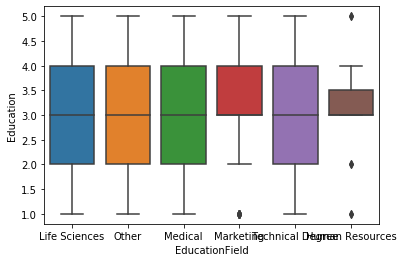

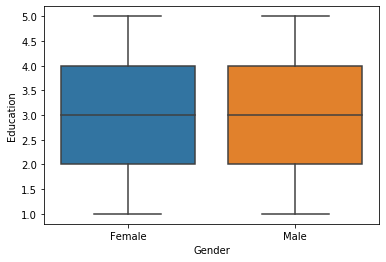

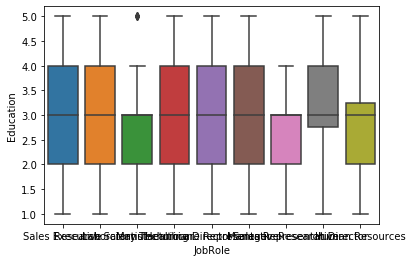

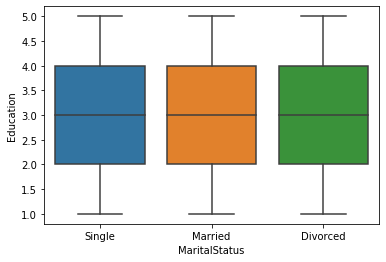

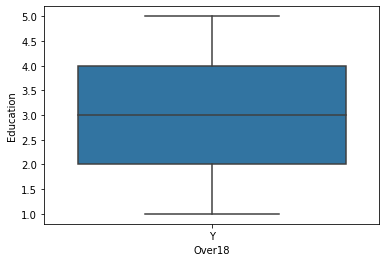

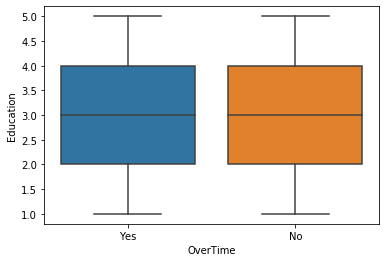

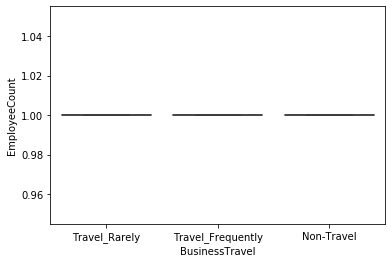

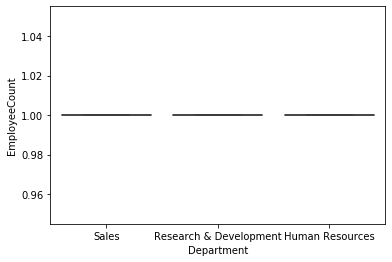

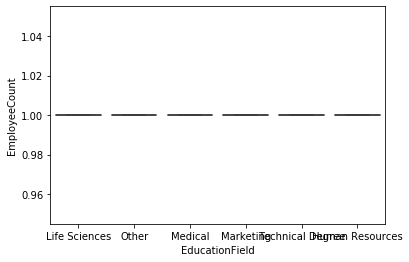

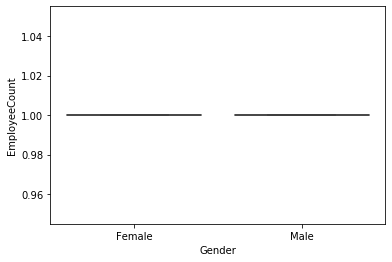

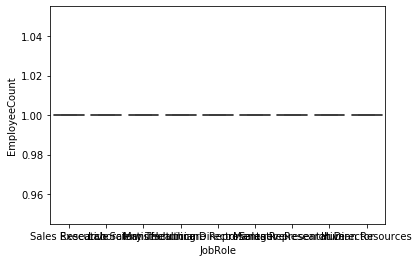

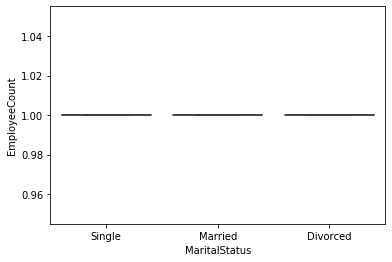

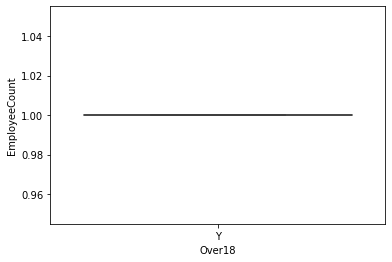

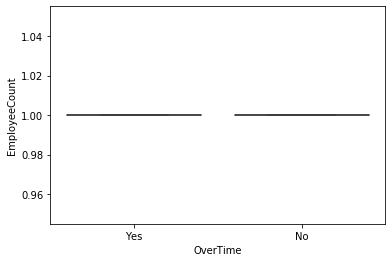

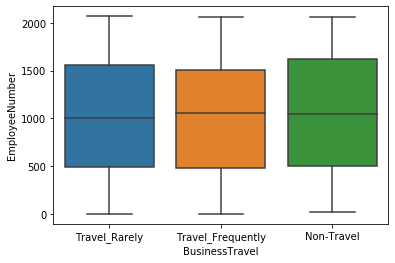

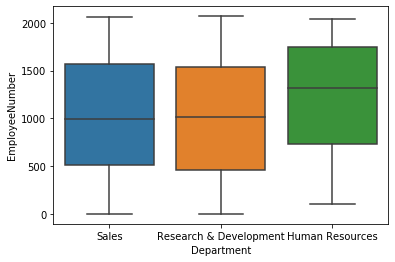

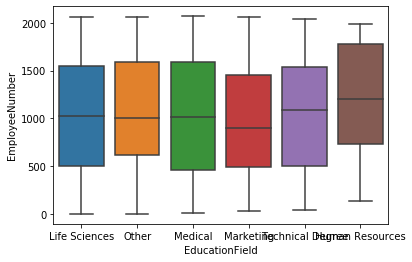

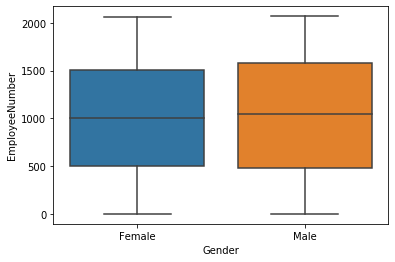

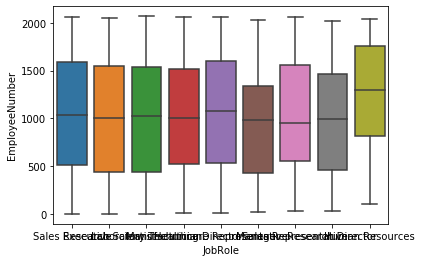

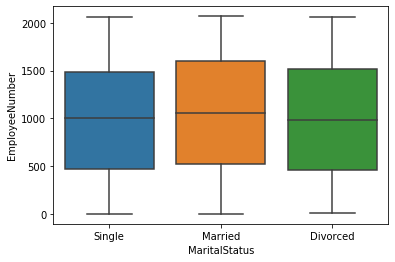

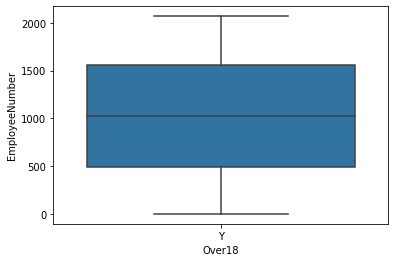

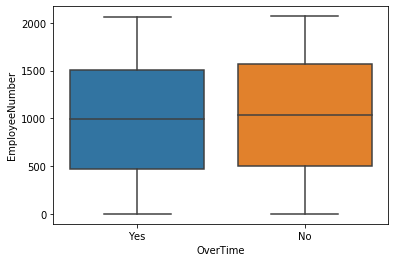

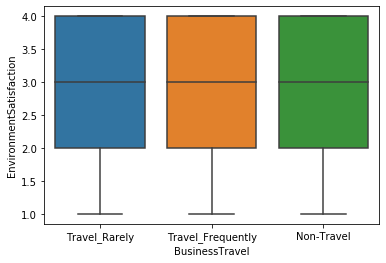

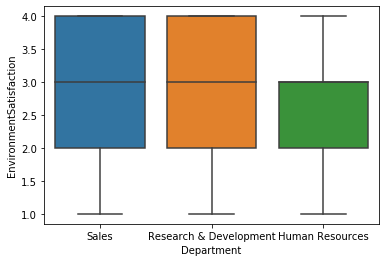

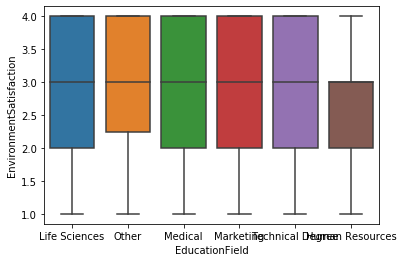

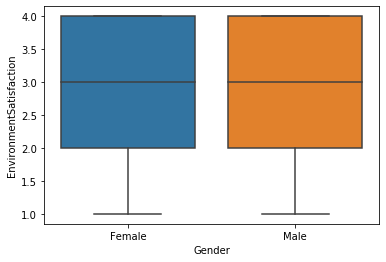

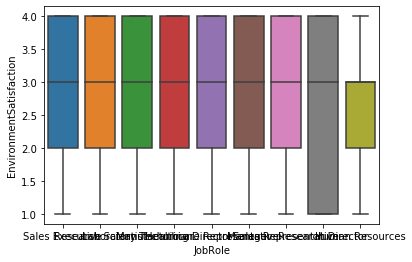

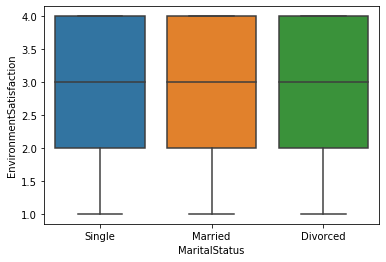

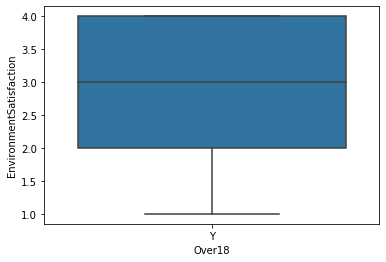

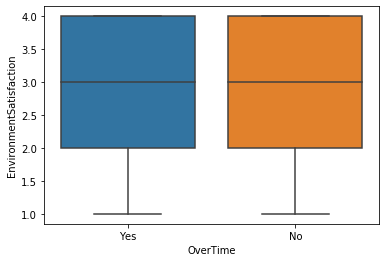

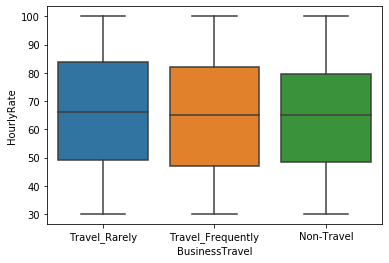

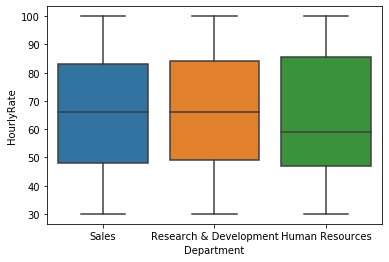

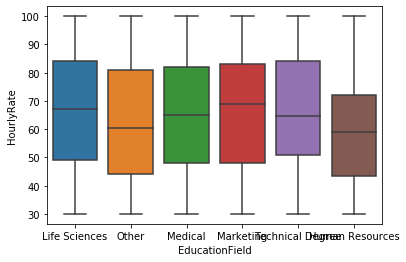

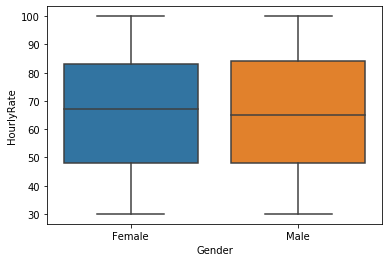

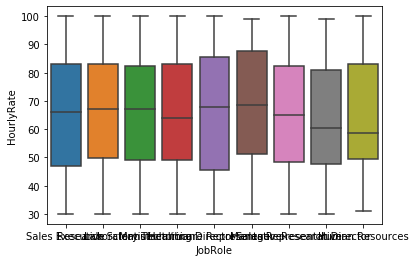

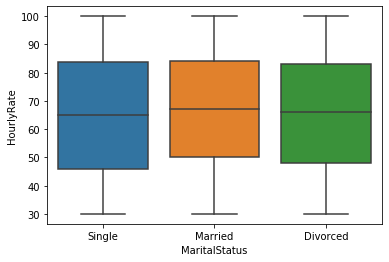

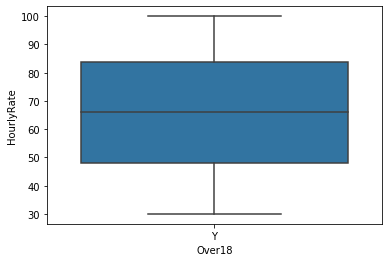

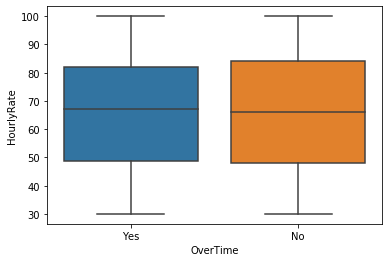

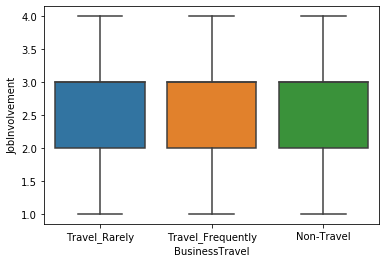

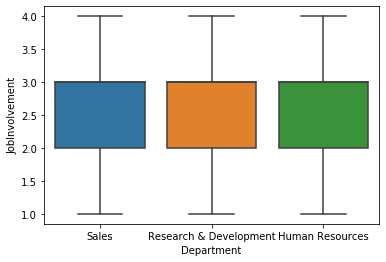

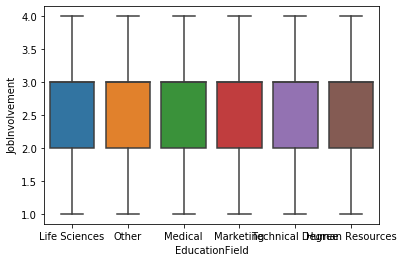

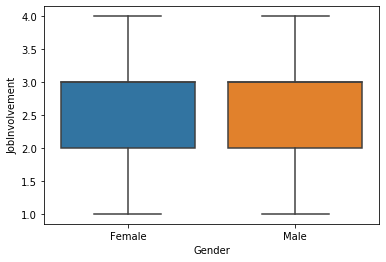

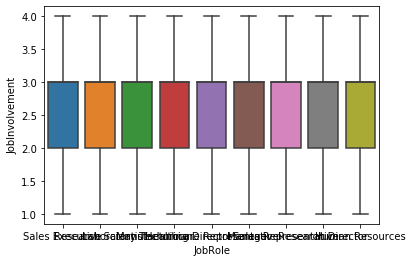

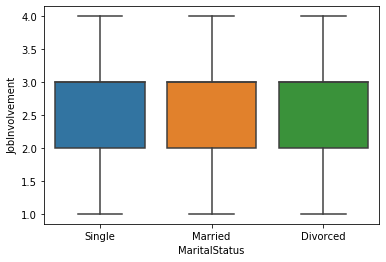

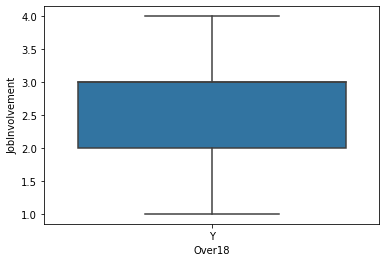

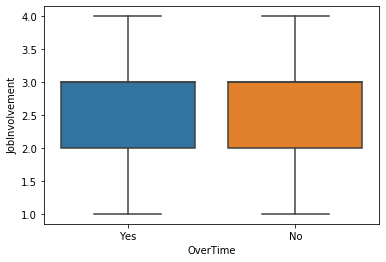

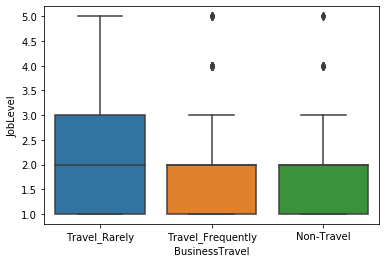

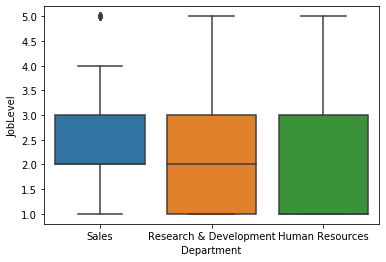

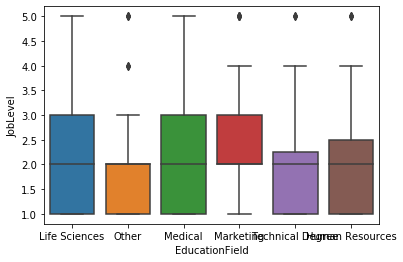

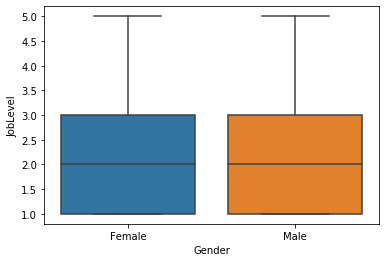

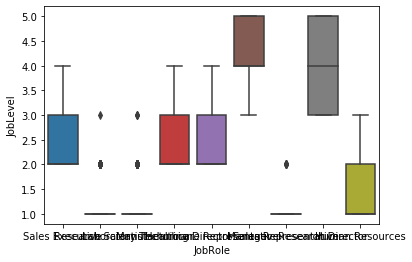

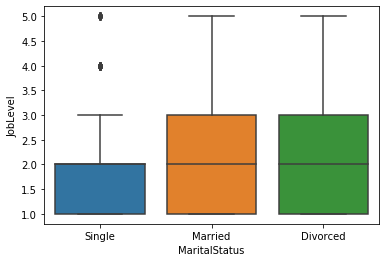

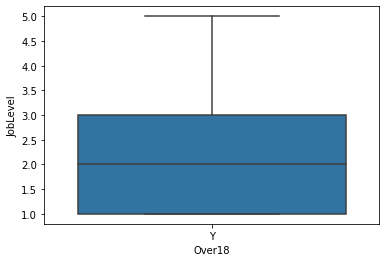

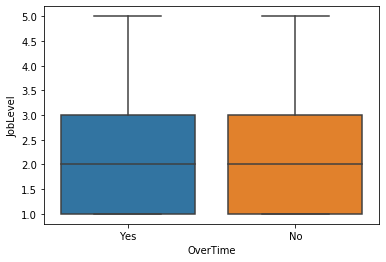

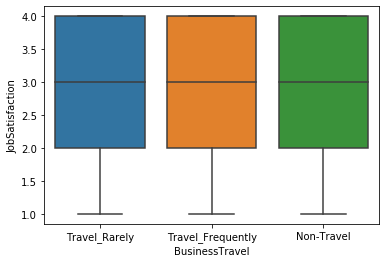

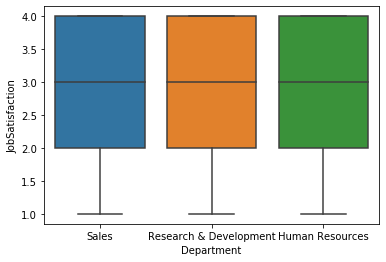

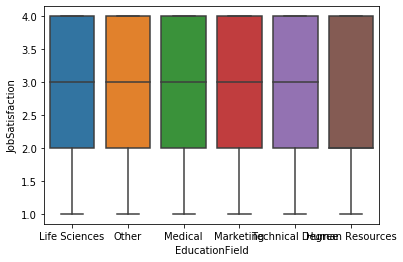

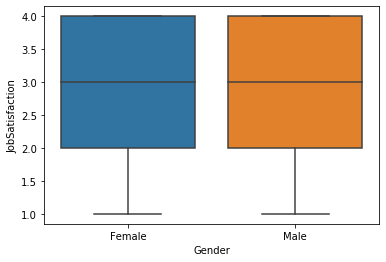

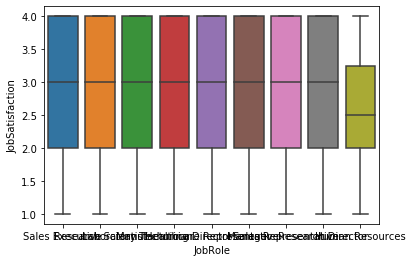

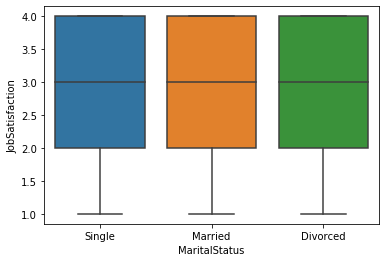

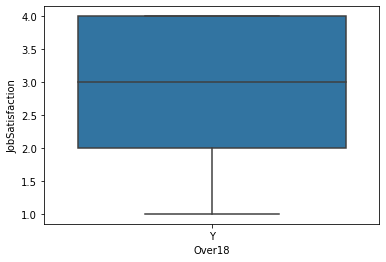

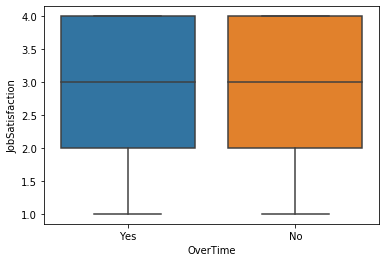

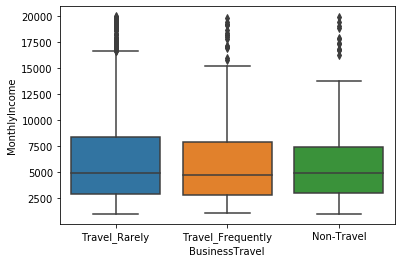

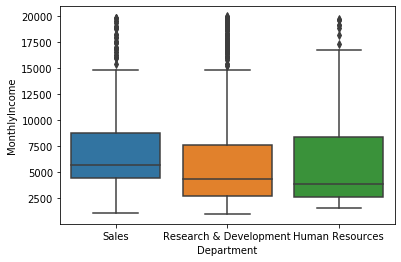

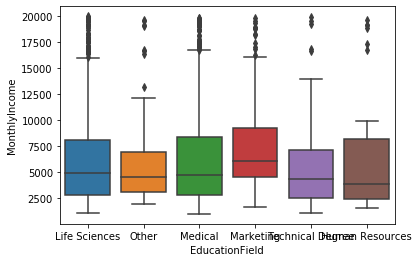

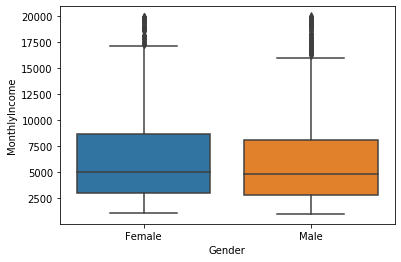

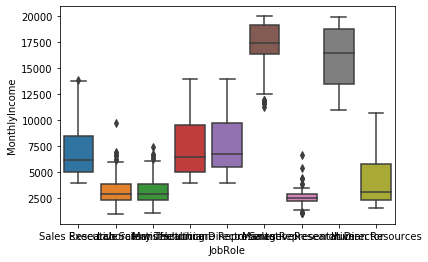

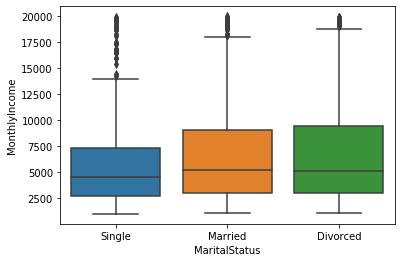

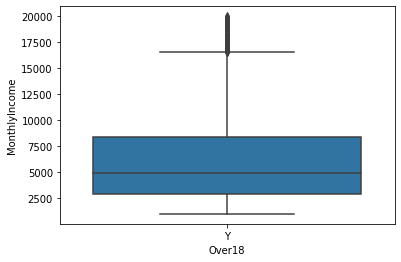

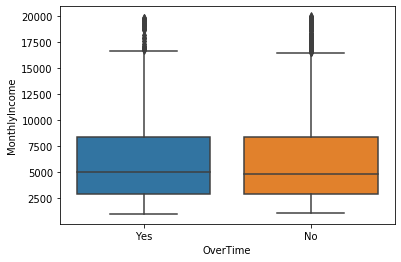

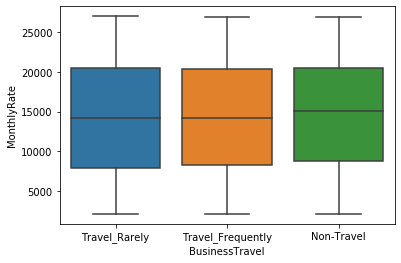

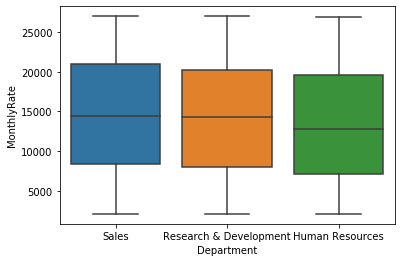

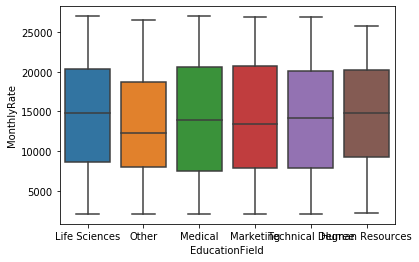

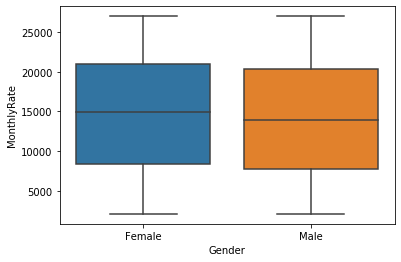

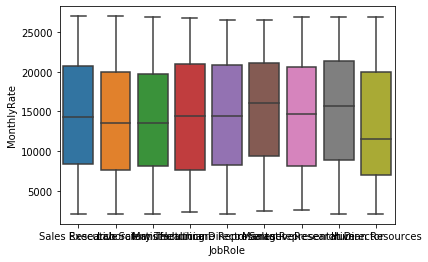

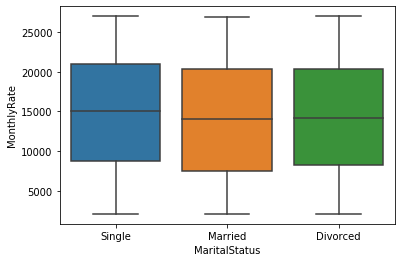

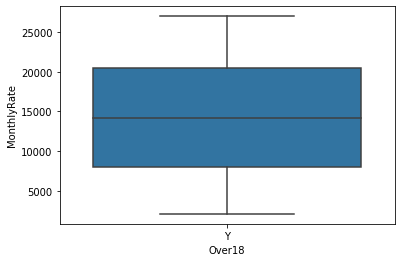

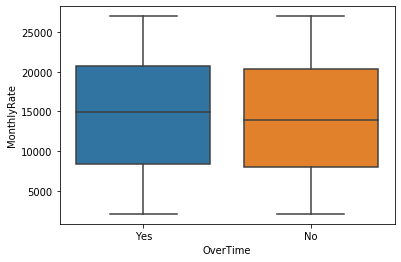

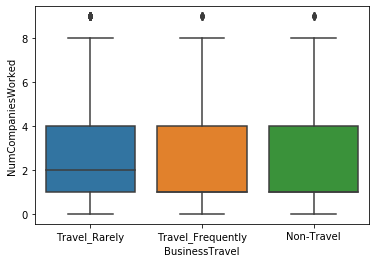

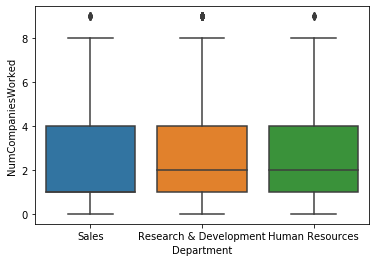

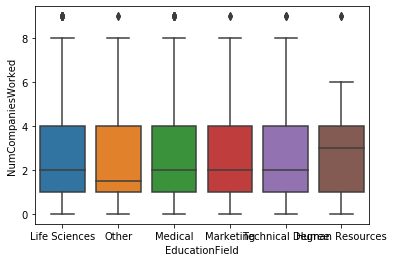

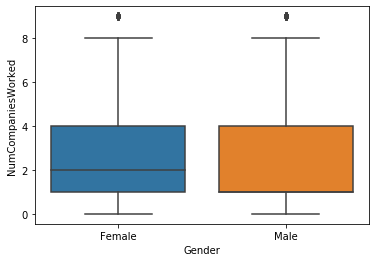

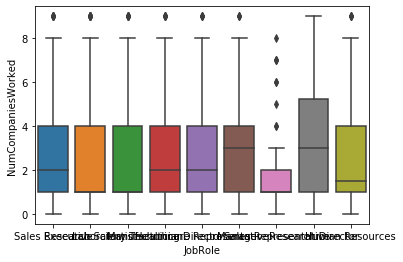

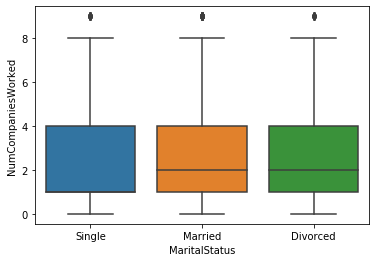

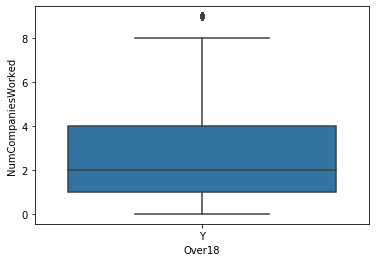

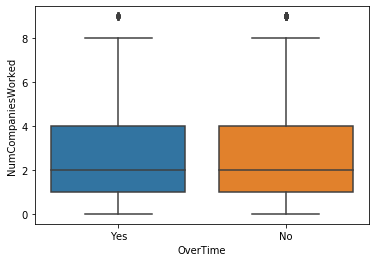

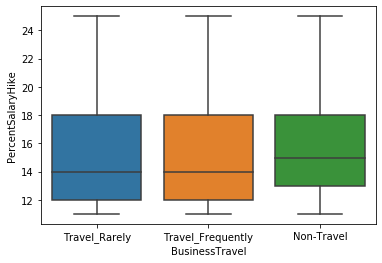

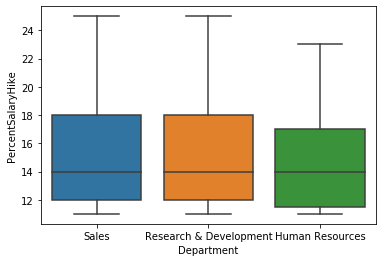

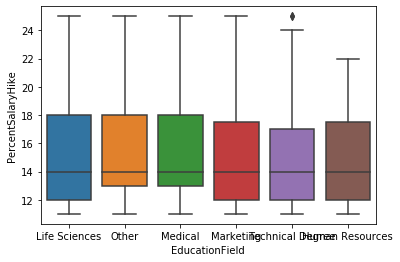

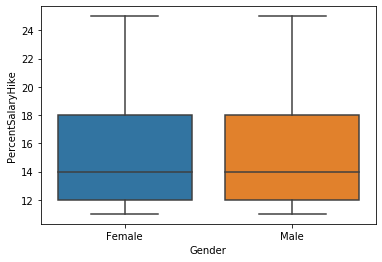

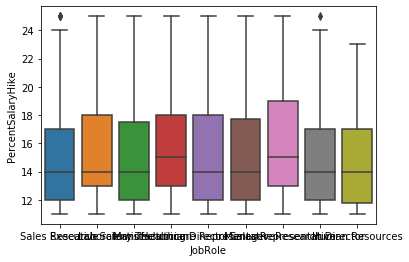

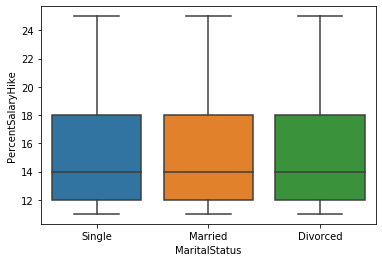

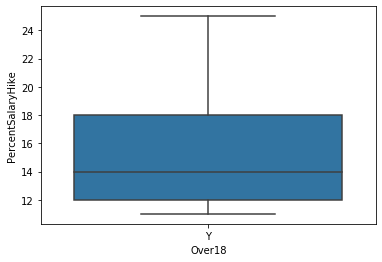

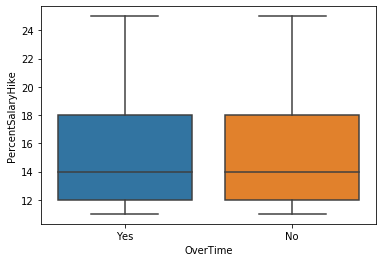

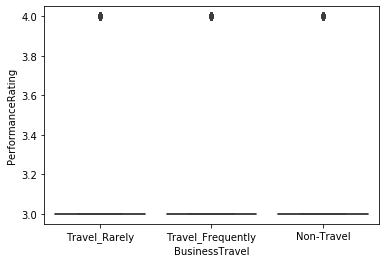

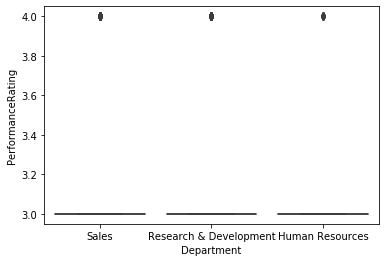

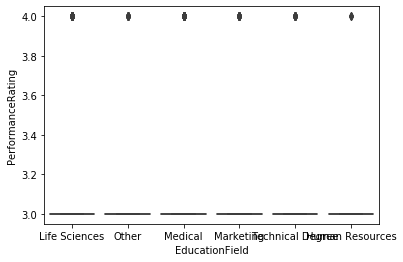

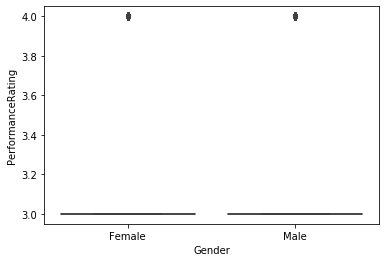

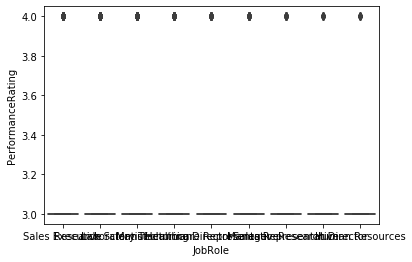

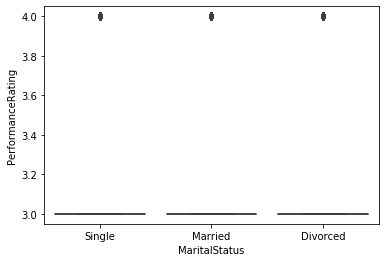

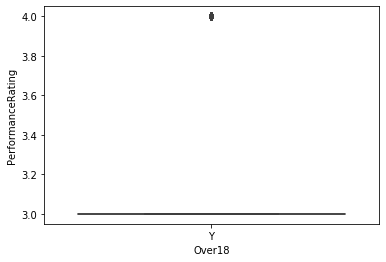

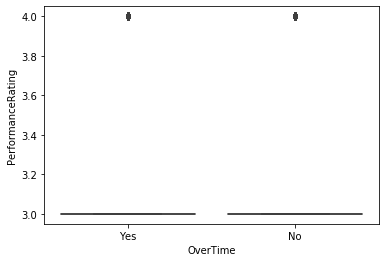

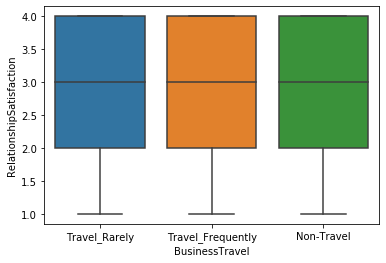

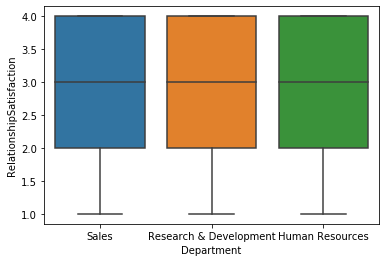

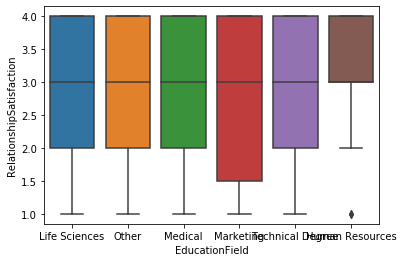

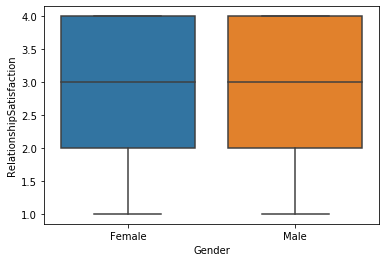

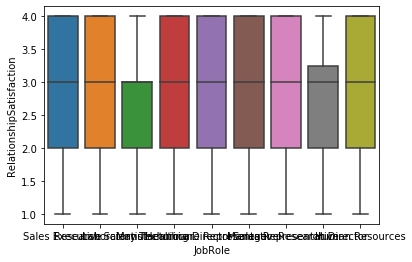

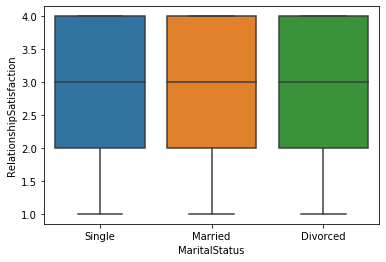

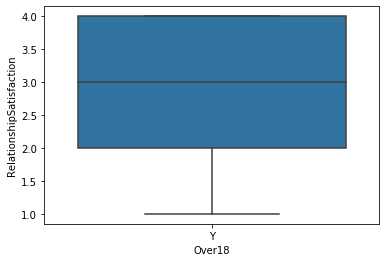

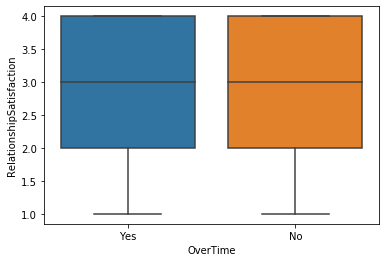

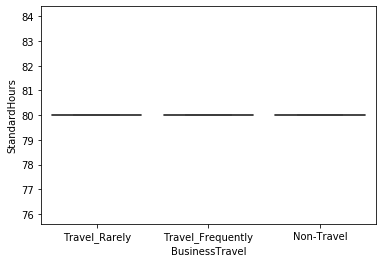

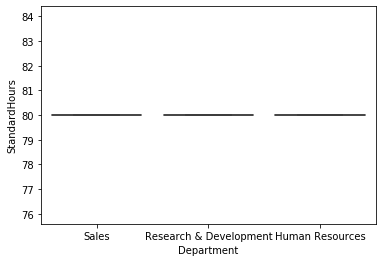

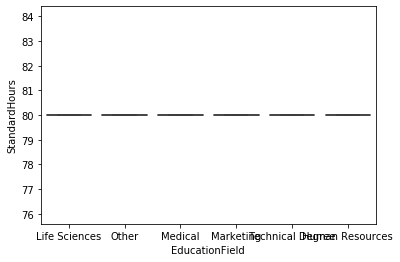

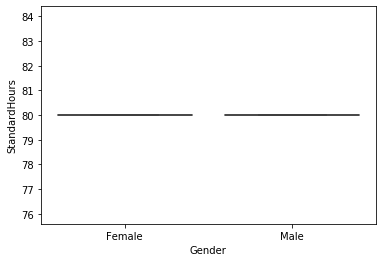

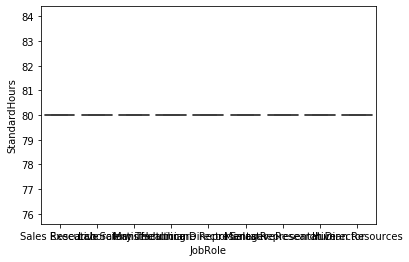

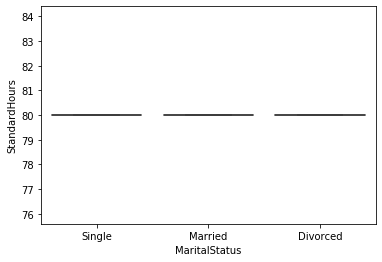

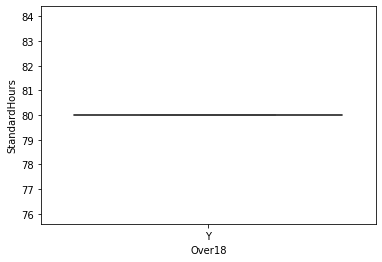

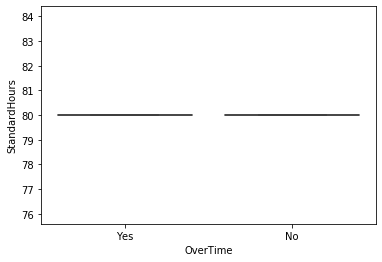

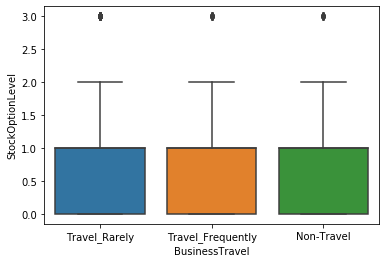

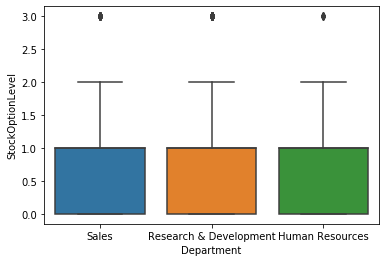

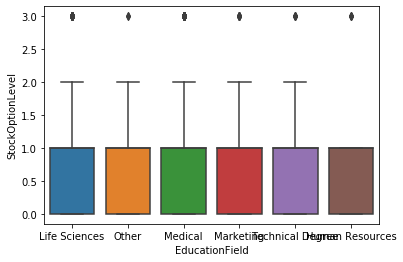

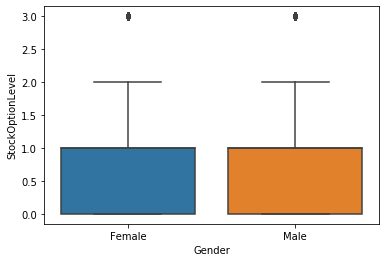

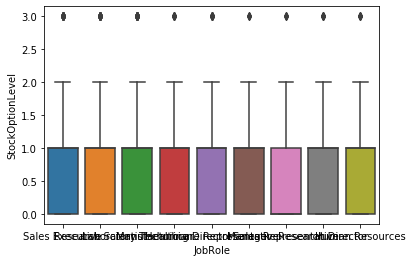

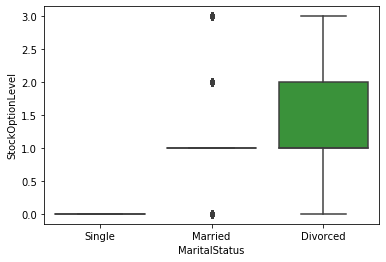

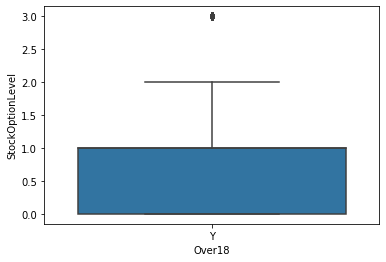

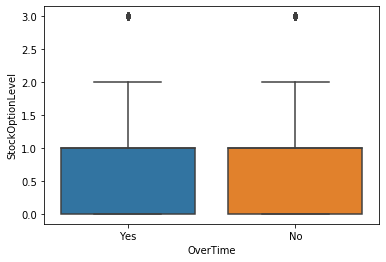

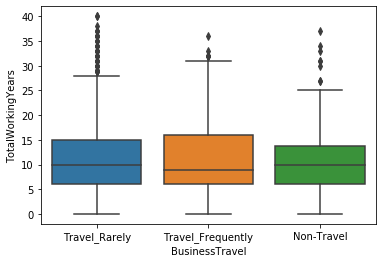

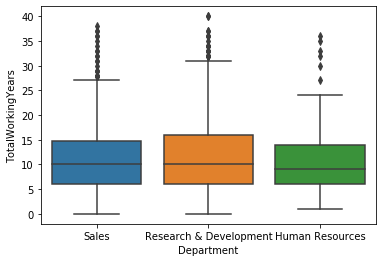

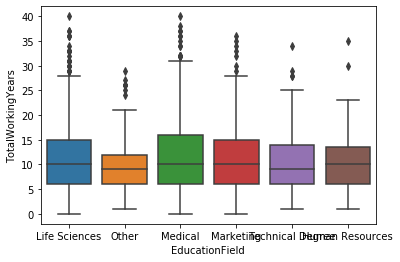

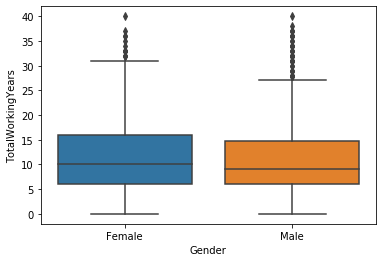

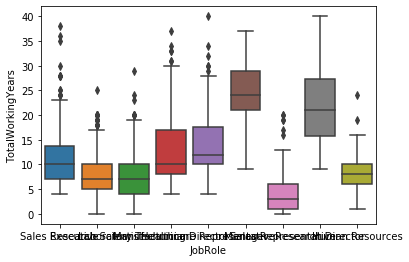

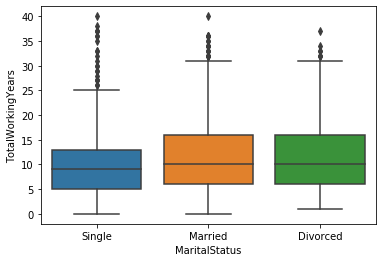

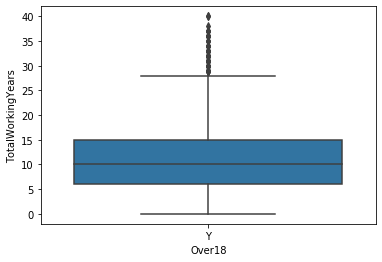

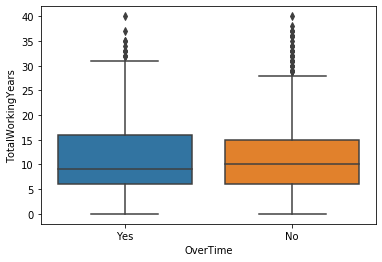

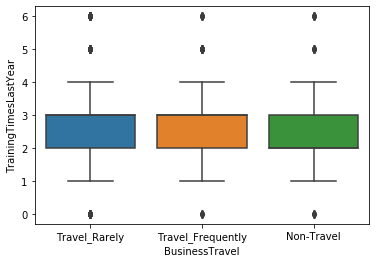

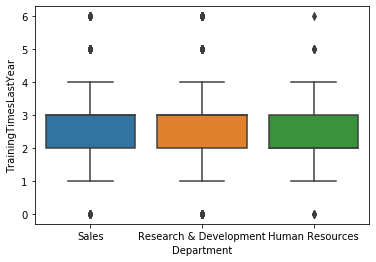

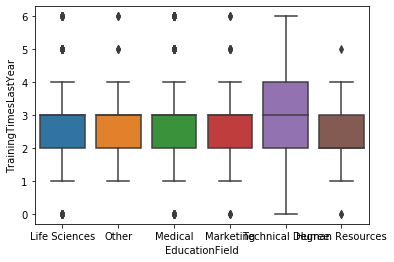

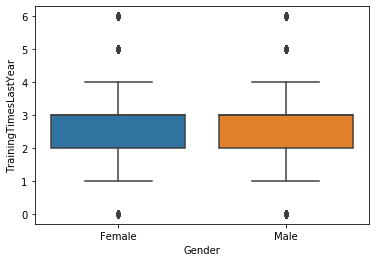

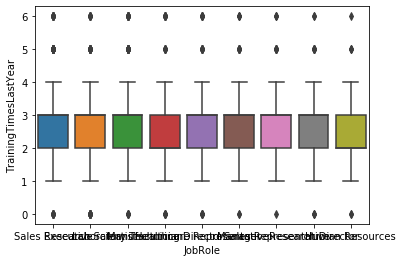

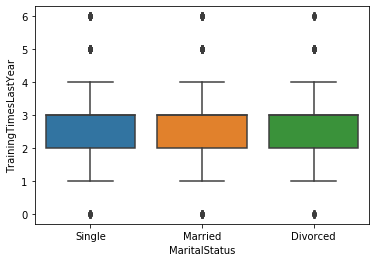

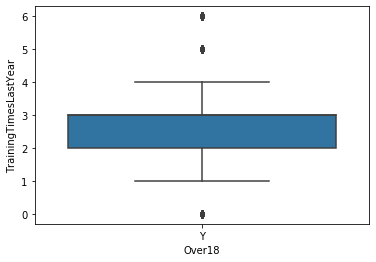

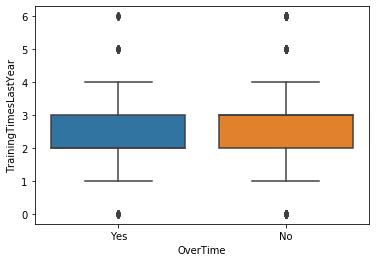

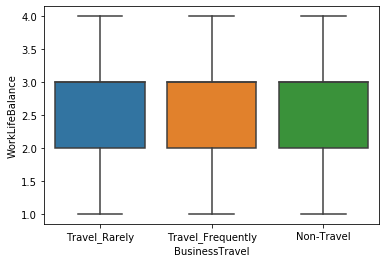

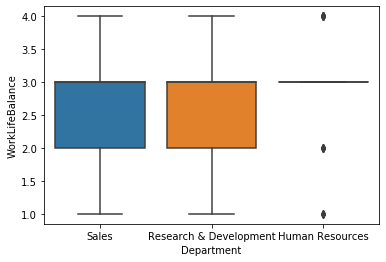

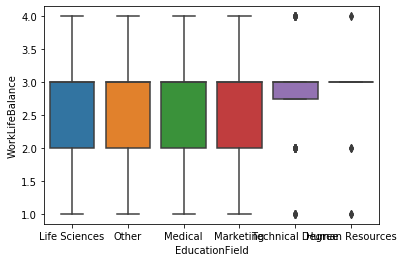

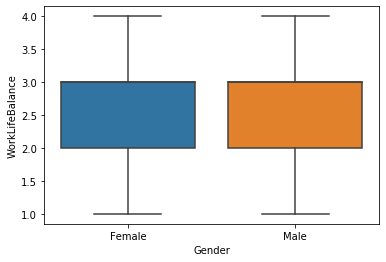

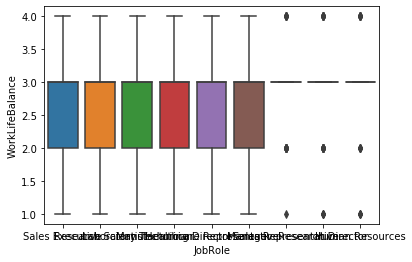

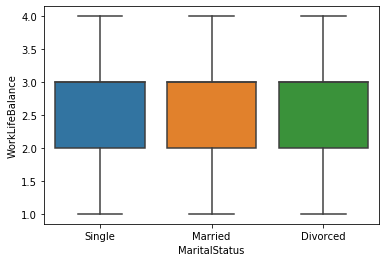

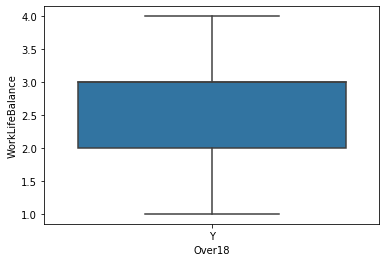

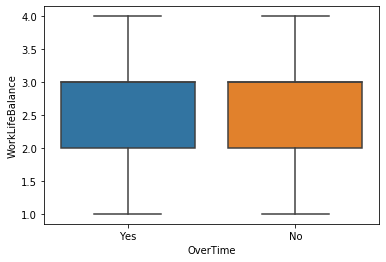

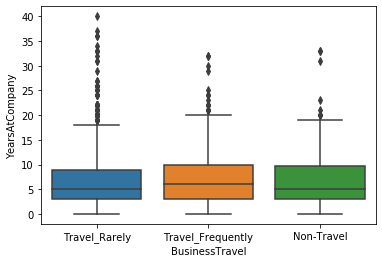

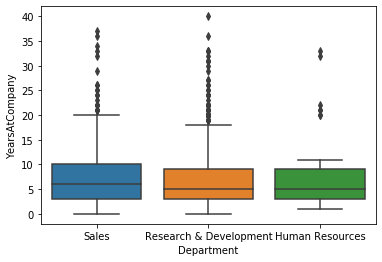

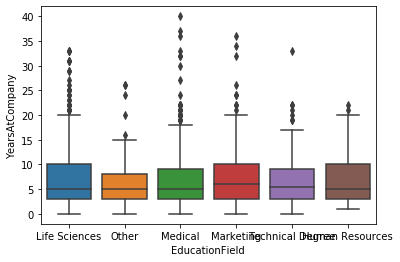

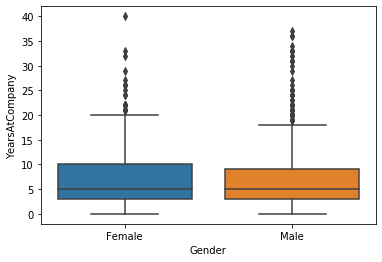

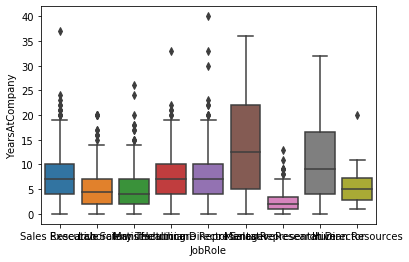

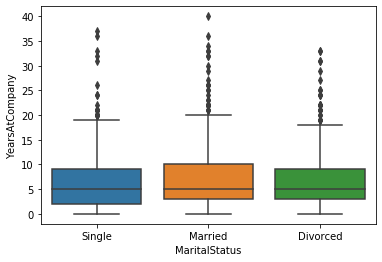

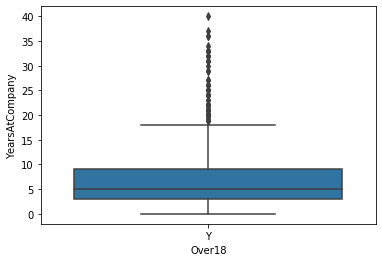

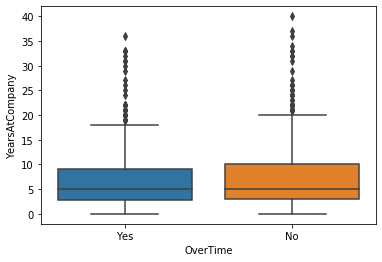

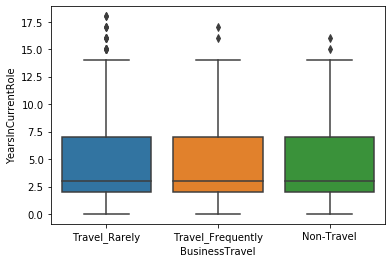

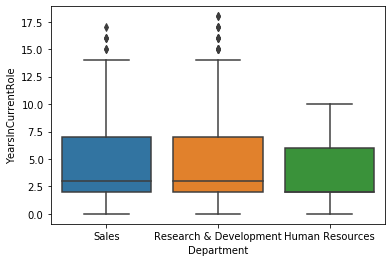

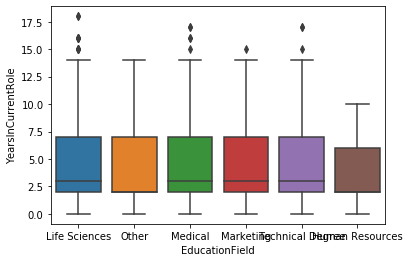

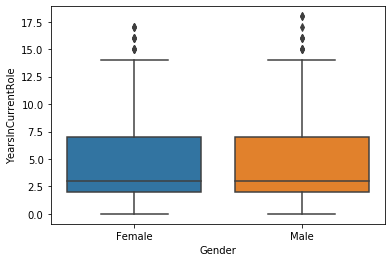

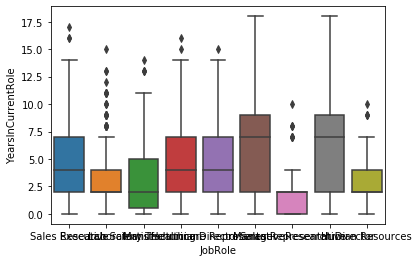

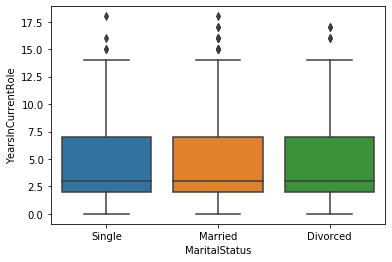

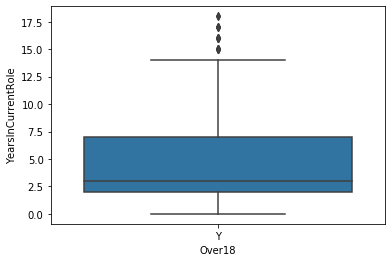

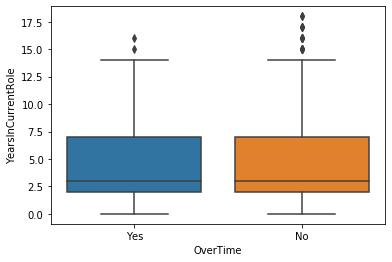

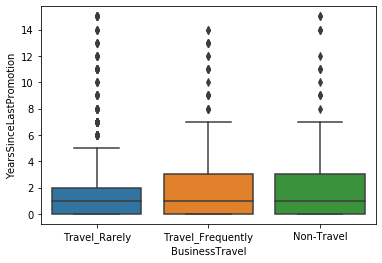

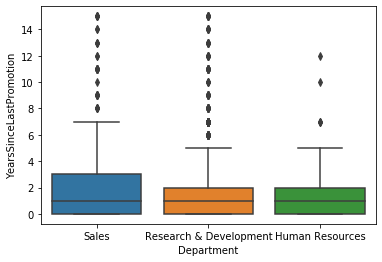

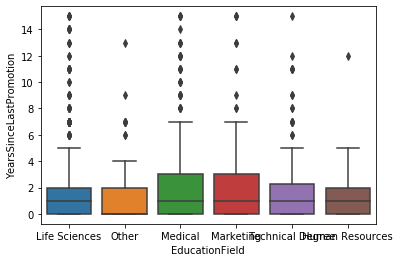

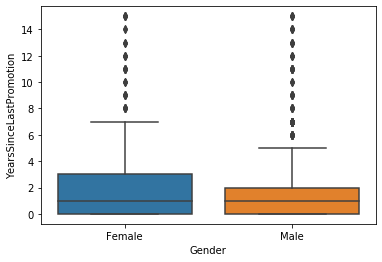

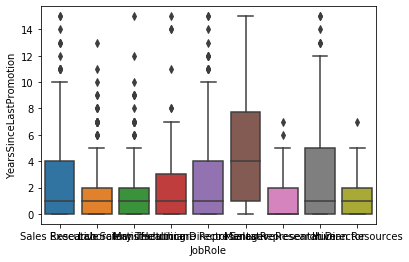

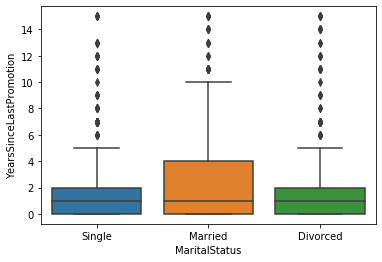

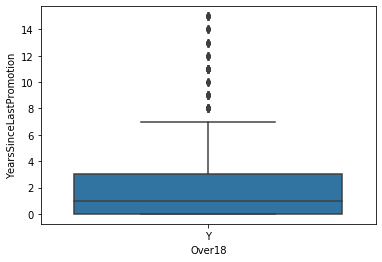

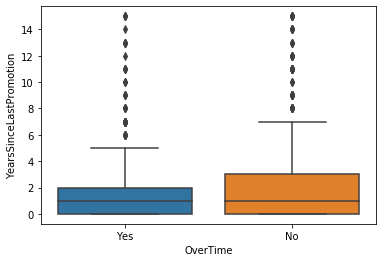

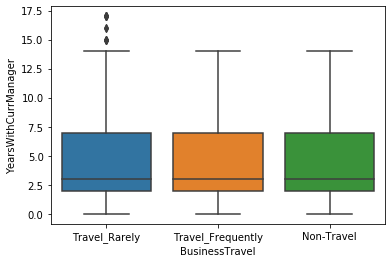

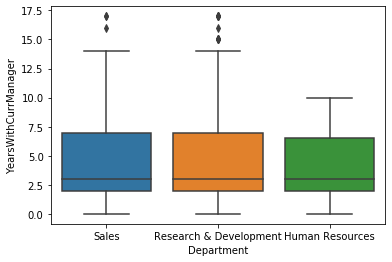

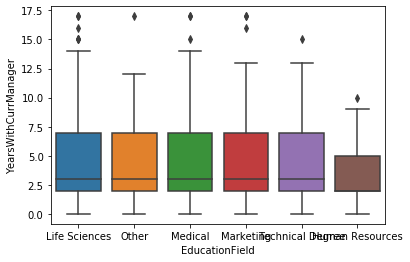

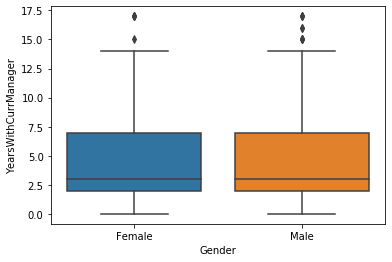

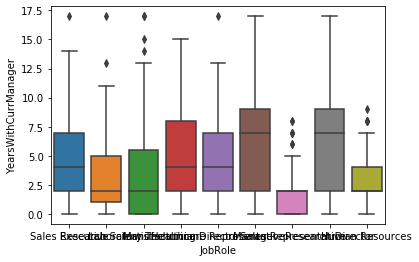

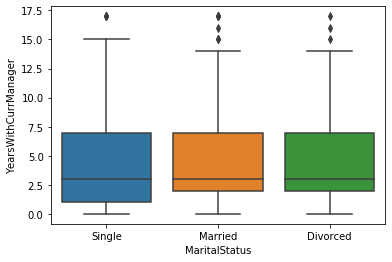

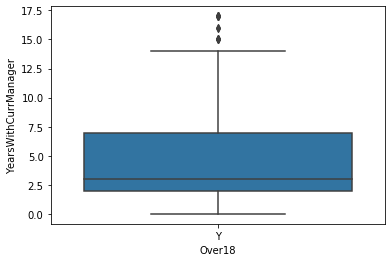

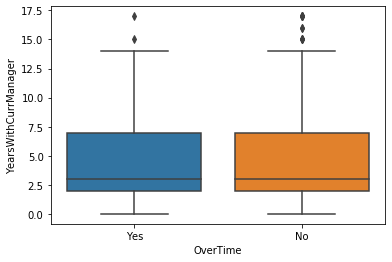

In [16]:
for i in con:
    for j in cat:
        sb.boxplot(A[j],A[i])
        plt.show()

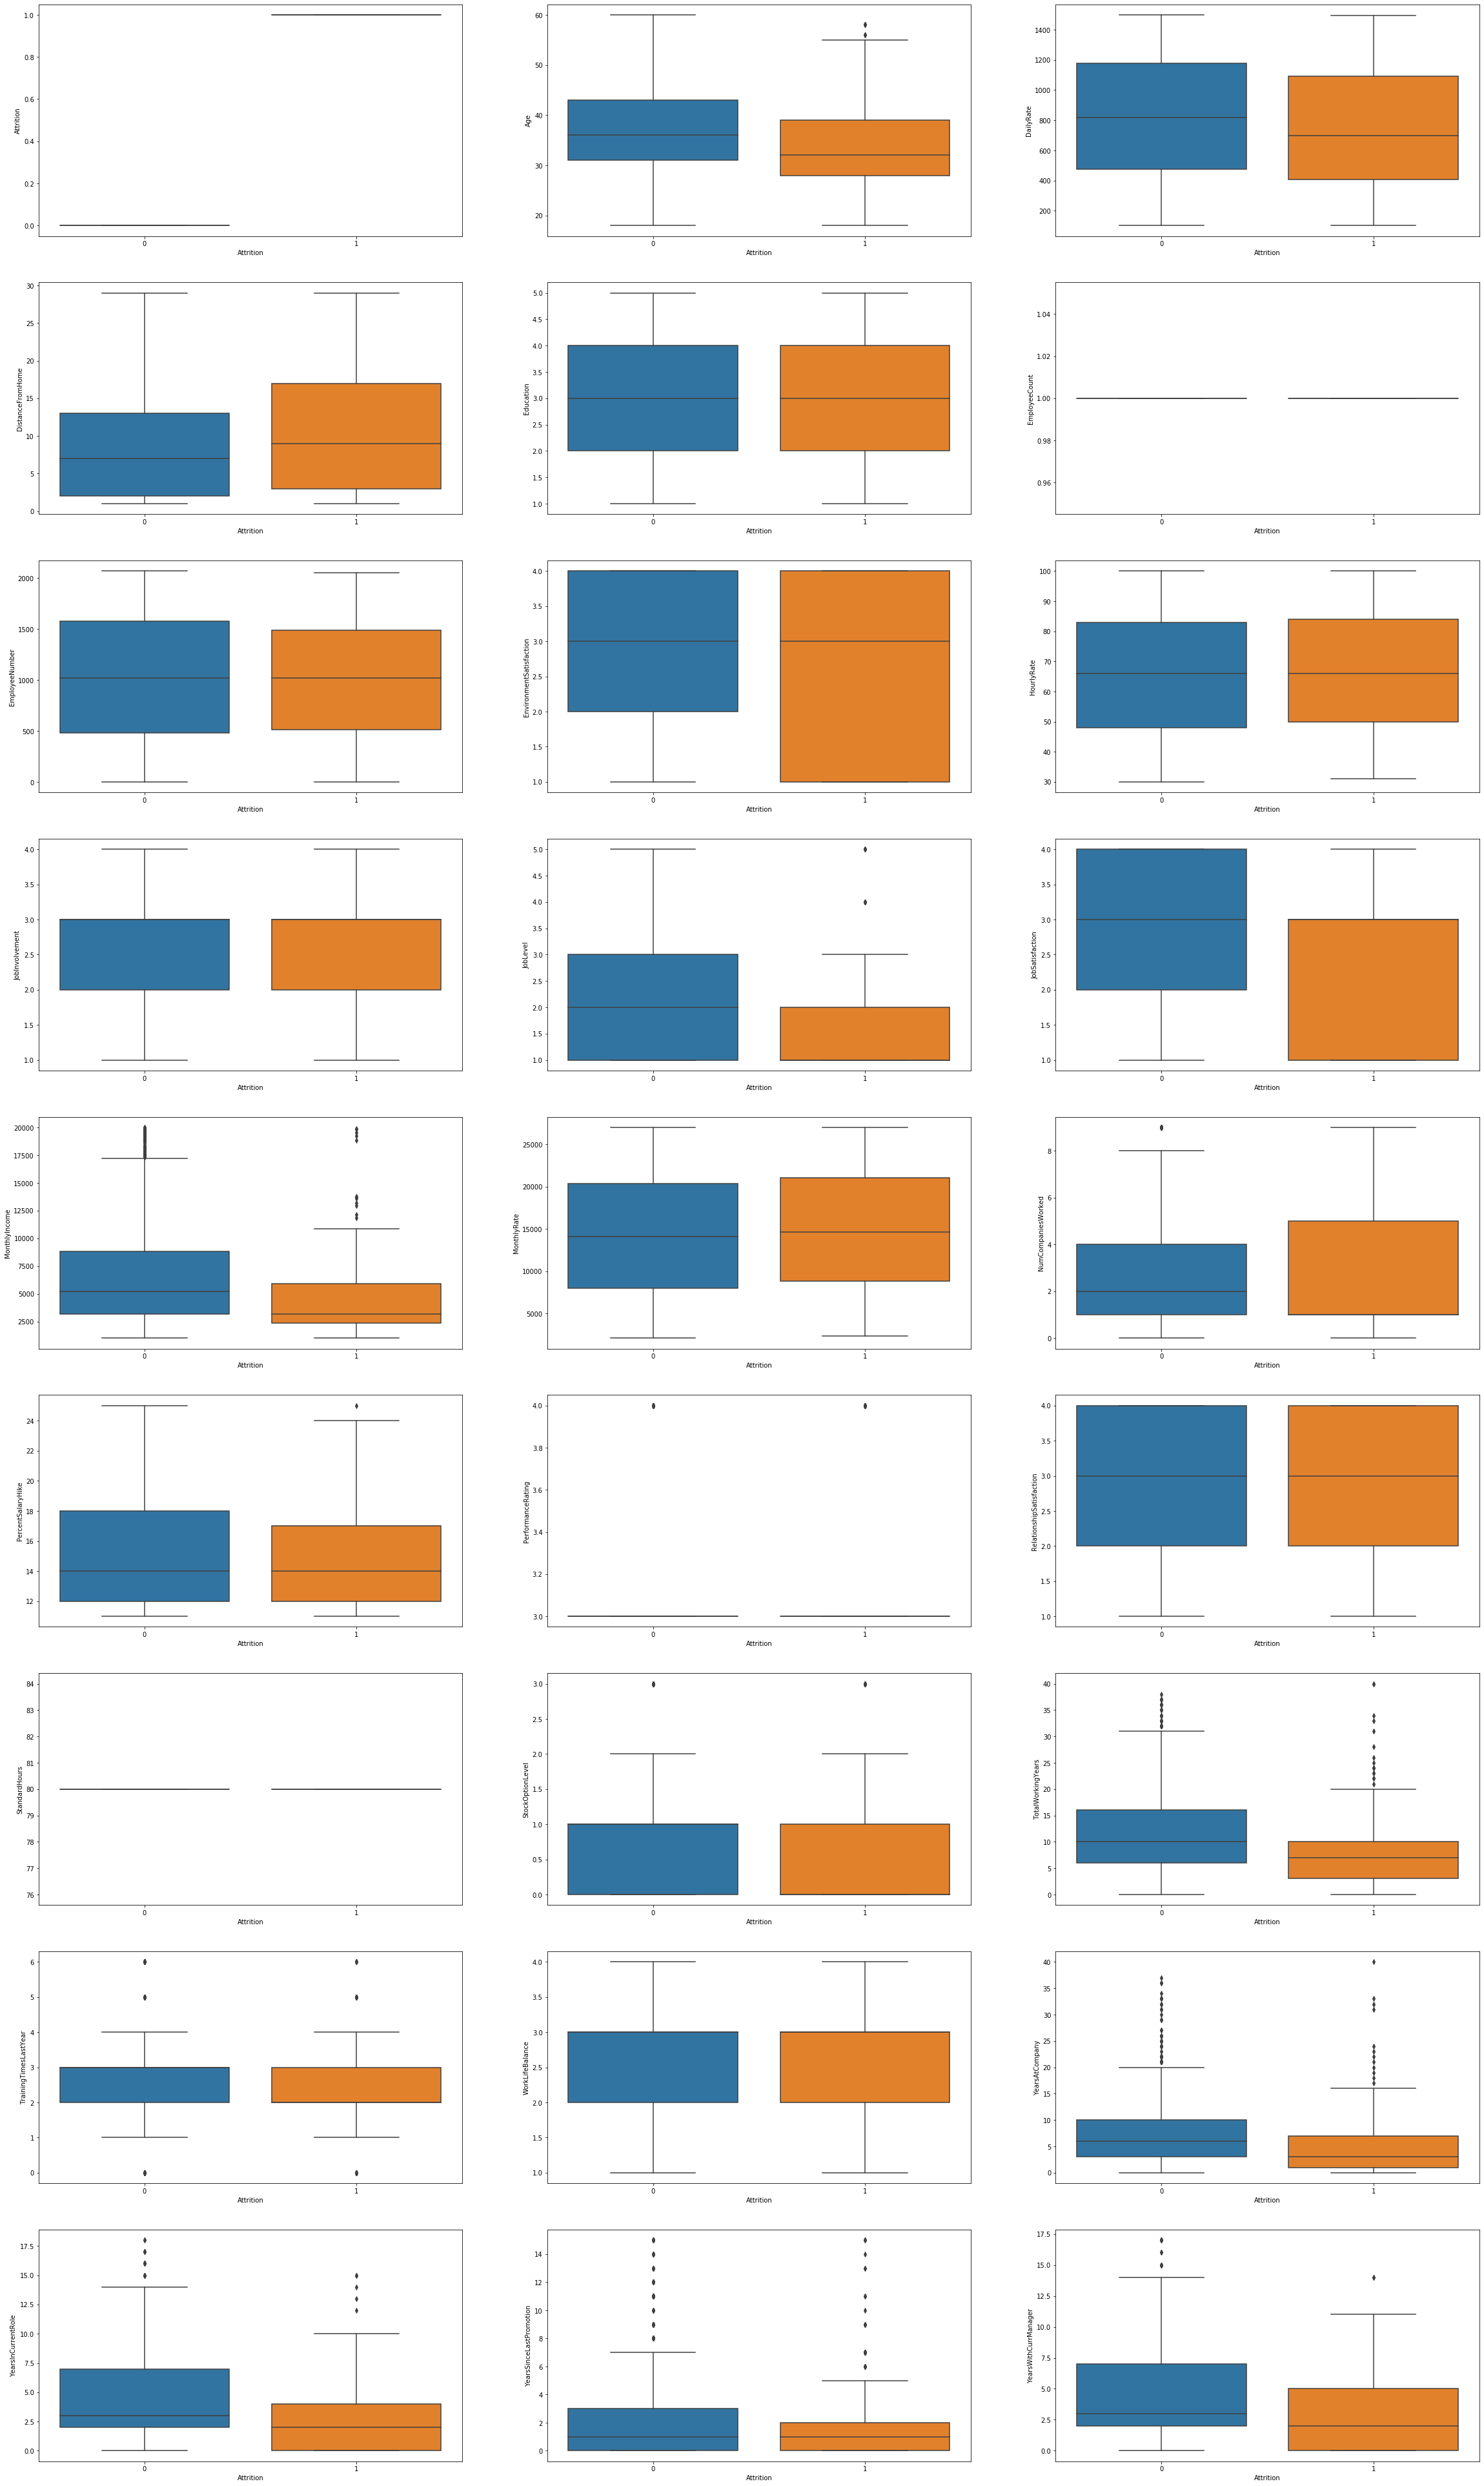

In [18]:
plt.figure(figsize=(40, 70))
c = 1
for i in con:
    plt.subplot(9, 3, c)
    c = c+1
    sb.boxplot(A.Attrition, A[i])

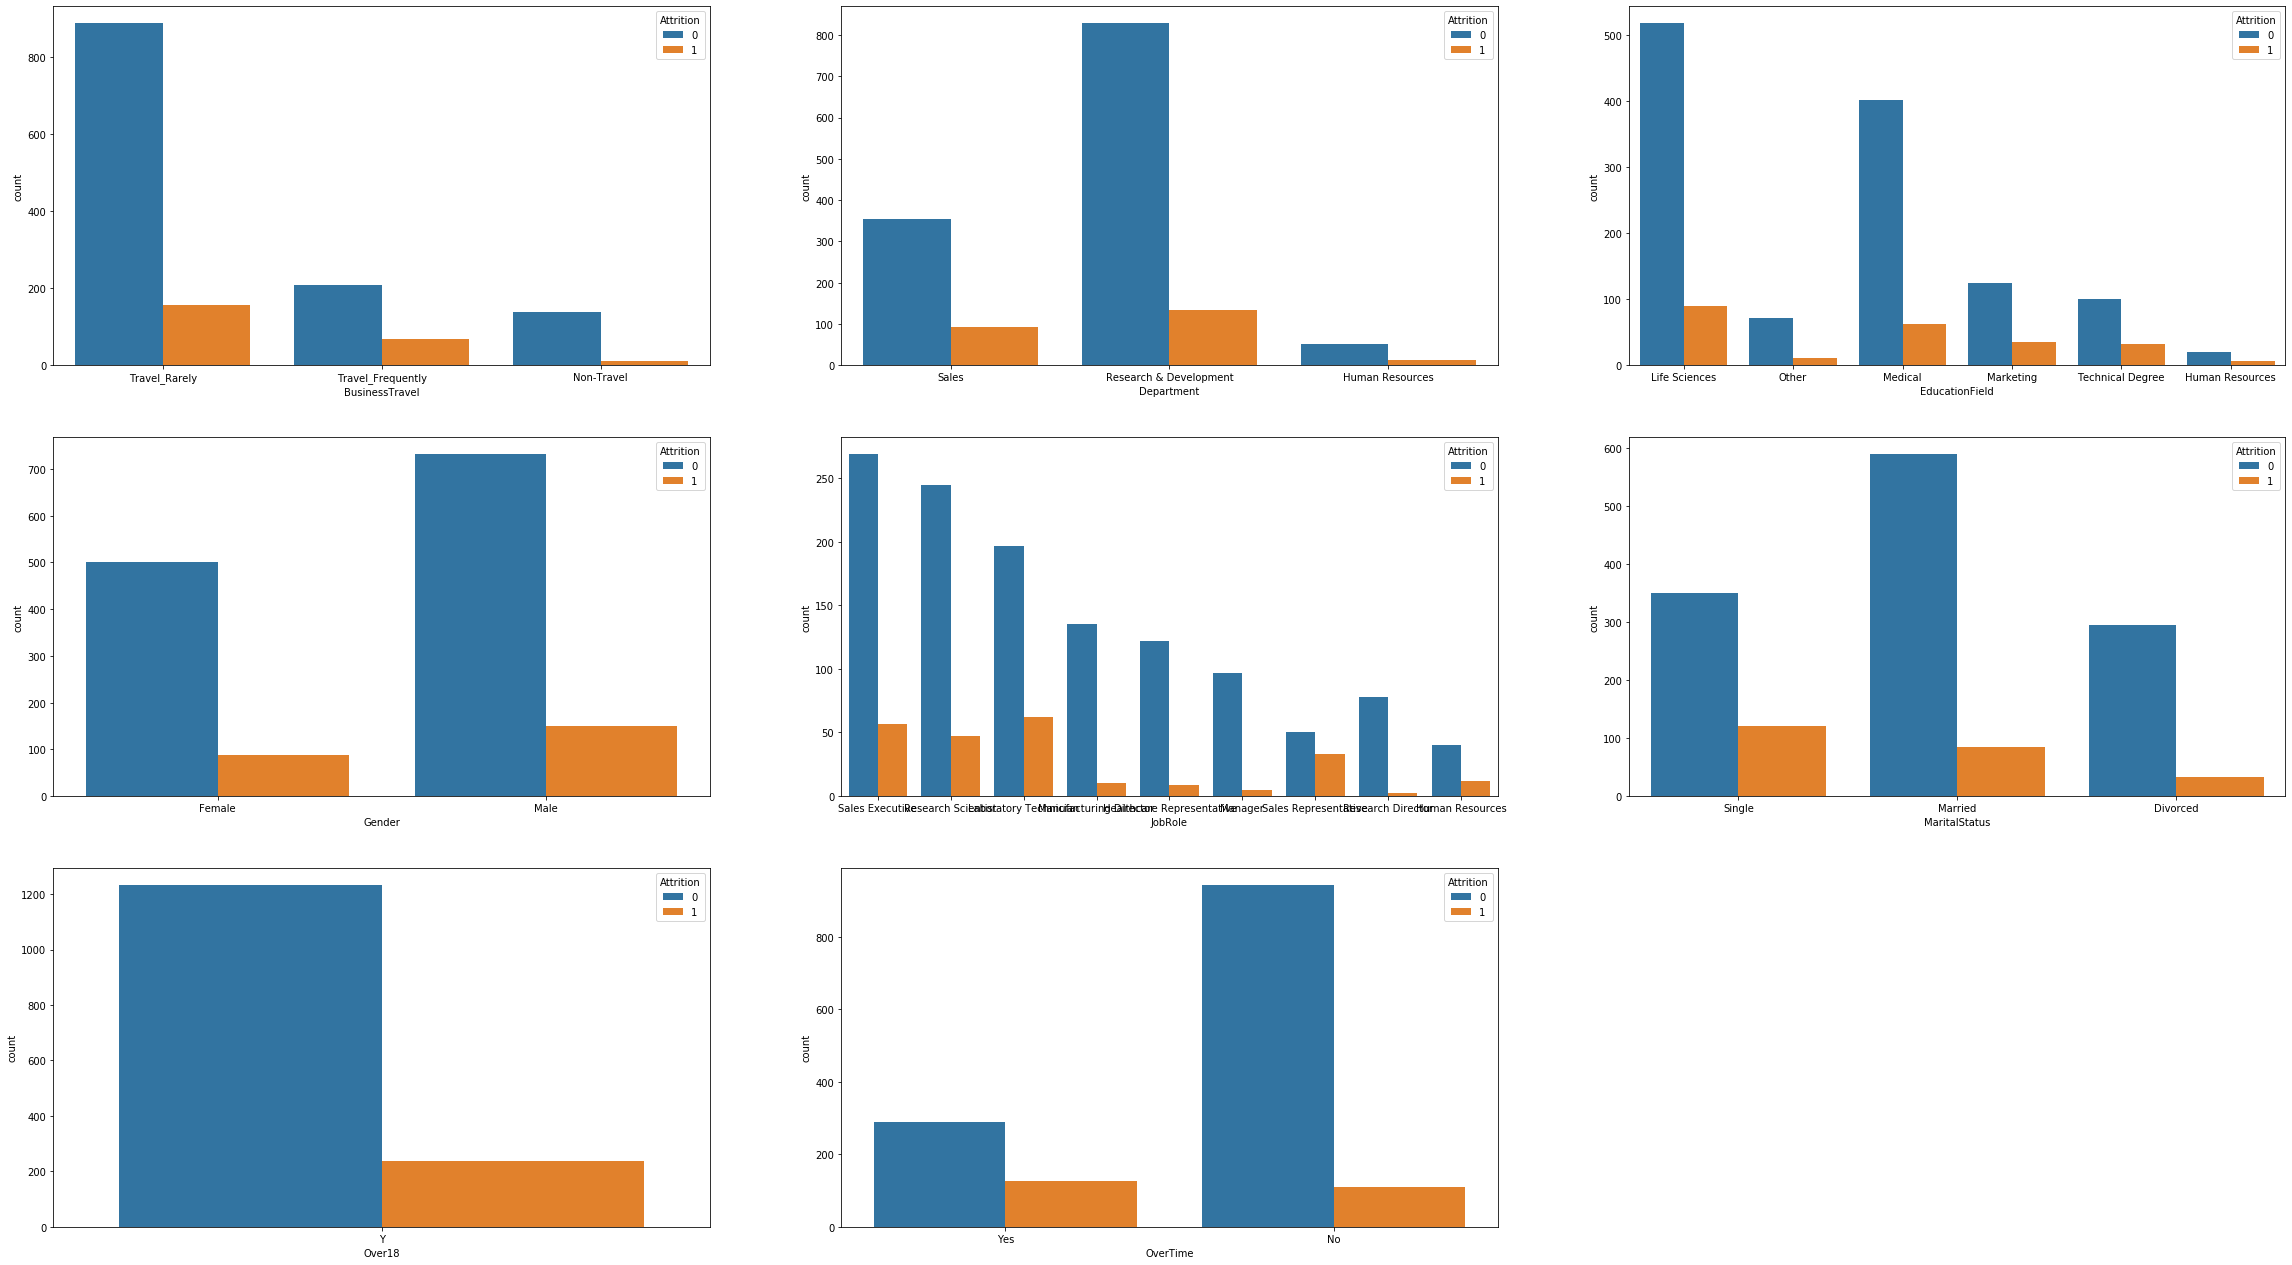

In [19]:
plt.figure(figsize=(40, 70))
c = 1
for i in cat:
    plt.subplot(9, 3, c)
    c = c + 1
    sb.countplot(A[i], hue=A['Attrition'])

In [20]:
A[con].corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [22]:
# Checking linearity of 'MonthlyRate' with continuous columns

A[con].corr()['MonthlyRate'].sort_values()

YearsWithCurrManager       -0.036746
StockOptionLevel           -0.034323
DailyRate                  -0.032182
Education                  -0.026084
YearsAtCompany             -0.023655
JobInvolvement             -0.016322
HourlyRate                 -0.015297
YearsInCurrentRole         -0.012815
PerformanceRating          -0.009811
PercentSalaryHike          -0.006429
RelationshipSatisfaction   -0.004085
JobSatisfaction             0.000644
TrainingTimesLastYear       0.001467
YearsSinceLastPromotion     0.001567
WorkLifeBalance             0.007963
EmployeeNumber              0.012648
Attrition                   0.015170
NumCompaniesWorked          0.017521
TotalWorkingYears           0.026442
DistanceFromHome            0.027473
Age                         0.028051
MonthlyIncome               0.034814
EnvironmentSatisfaction     0.037600
JobLevel                    0.039563
MonthlyRate                 1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

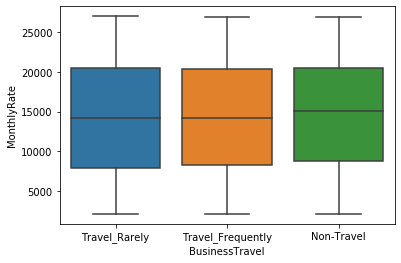

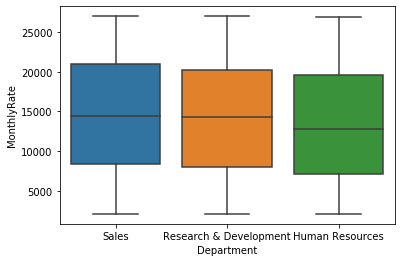

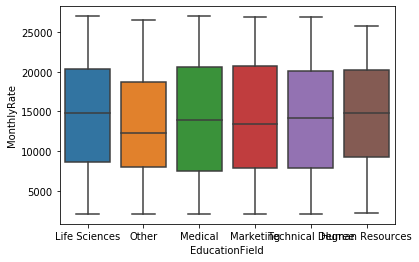

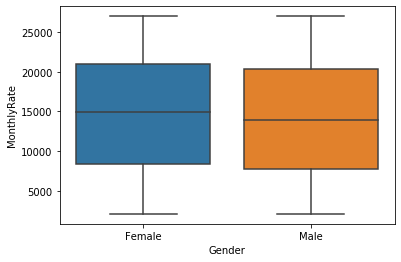

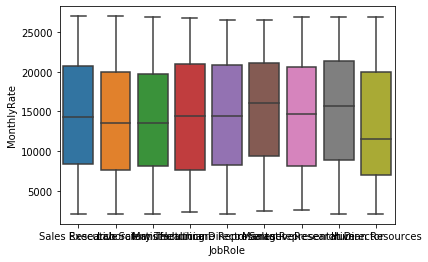

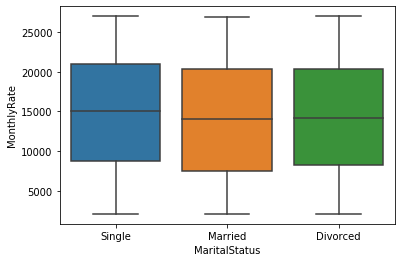

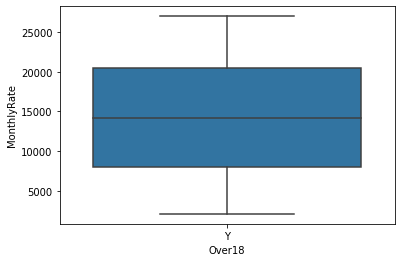

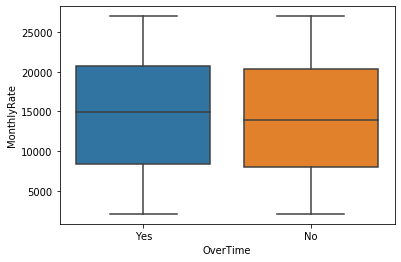

In [23]:
# Checking linearity of 'MonthlyRate' with categorical columns

for i in cat:
    sb.boxplot(A[i], A.MonthlyRate)
    plt.show()

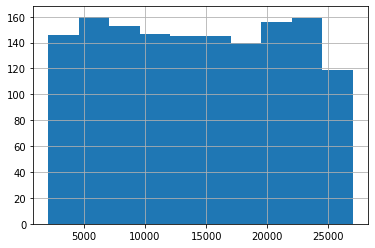

In [26]:
# Checking data distribution of 'MonthlyRate'

A.MonthlyRate.hist()

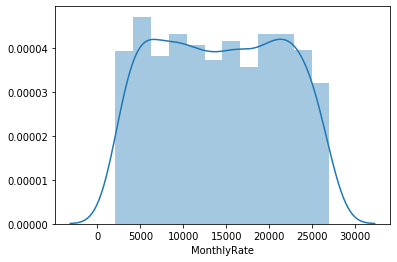

In [27]:
# Checking data distribution of 'MonthlyRate'

sb.distplot(A.MonthlyRate)

## Now Prediction is to be made for 'MonthlyRate' column

In [28]:
# Label Encoding for categorical columns and moving the new label encoded dataset to 'B'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
A1 = A[cat].apply(le.fit_transform)
B = A[con].join(A1)

In [29]:
# We are removing the columns from X which are non-linear to 'MonthlyRate' for Linear Regression 

X = B.drop(labels=["MonthlyRate", "HourlyRate", "JobRole", "Over18", "OverTime", "WorkLifeBalance", "TotalWorkingYears",
                   "JobInvolvement", "Gender", "MaritalStatus", "StockOptionLevel", "EducationField", "YearsWithCurrManager",
                   "Department", "Education", "Age", "PerformanceRating", "TrainingTimesLastYear", "EmployeeNumber",
                   "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "RelationshipSatisfaction", "Attrition",
                   "JobSatisfaction"], axis=1)
Y = B[['MonthlyRate']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest, pred)
print("MAE for Linear Model is %.2f"%MAE)

MAE for Linear Model is 6280.37


In [30]:
# We are removing the columns from X which are non-linear to 'MontlyRate' for Test of Hypothesis

X = B.drop(labels=["MonthlyRate", "HourlyRate", "JobRole", "Over18", "OverTime", "WorkLifeBalance", "TotalWorkingYears",
                   "JobInvolvement", "Gender", "MaritalStatus", "StockOptionLevel", "EducationField", "YearsWithCurrManager",
                   "Department", "Education", "Age", "PerformanceRating", "TrainingTimesLastYear", "EmployeeNumber",
                   "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "RelationshipSatisfaction", "Attrition",
                   "JobSatisfaction"], axis=1)
Y = B[['MonthlyRate']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
est = ols.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.594
Date:                Sat, 17 Oct 2020   Prob (F-statistic):            0.00821
Time:                        23:36:25   Log-Likelihood:                -12091.
No. Observations:                1176   AIC:                         2.420e+04
Df Residuals:                    1167   BIC:                         2.424e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
DailyRate                  -1.0960      0.519     -2.113      0.035      -2.114      -0.078
DistanceFromHome           38.1879     25.331      1.508      0.132     -11.511      87.886
EmployeeCount               2.1792      0.152     14.291      0.000       1.880       2.478
EnvironmentSatisfaction   360.1384    189.613      1.899      0.058     -11.882     732.159
JobLevel                  535.0916    218.522      2.449      0.014     106.352     963.831
StandardHours             174.3398     12.199     14.291      0.000     150.405     198.275
YearsAtCompany           -154.8370     58.312     -2.655      0.008    -269.245     -40.429
YearsInCurrentRole        105.2224     87.634      1.201      0.230     -66.715     277.159
YearsSinceLastPromotion    86.5763     83.354      1.039      0.299     -76.964     250.116
BusinessTravel           -451.3565    315.494     -1.431      0.153   -1070.355     167.642
==============================================================================
Omnibus:                      854.739   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.339
Skew:                           0.040   Prob(JB):                     5.32e-16
Kurtosis:                       1.805   Cond. No.                     1.34e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.36e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
# Checking the best 'max_depth' through cross-validation

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
tp = {"max_depth":range(2,20,1)}
dtr = DecisionTreeRegressor(random_state=30)
cv = GridSearchCV(dtr, tp, scoring="neg_mean_absolute_error", cv=3)
cvmodel = cv.fit(X, Y)
cvmodel.best_params_

{'max_depth': 3}

In [33]:
# Removing only 'MonthlyRate' and performing 'DecisionTreeRegressor' using fetched pruning parameters

X = B.drop(labels=["MonthlyRate"], axis=1)
Y = B[['MonthlyRate']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=30, max_depth=3)
model = dtr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest, pred)
print("MAE for Decision_tree is %.2f"%MAE)

MAE for Decision_tree is 6293.02


In [34]:
# Checking the best 'max_depth' and 'n_estimators' through cross-validation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
tp = {"max_depth":range(2, 20, 1), "n_estimators":range(2, 20, 1)}
rfr = RandomForestRegressor(random_state=30)
cv = GridSearchCV(rfr, tp, scoring="neg_mean_absolute_error", cv=3)
cvmodel = cv.fit(X, Y)
cvmodel.best_params_

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531:

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 2, 'n_estimators': 6}

In [35]:
# Removing only 'MonthlyRate' and performing 'RandomForestRegressor' using fetched pruning parameters

X = B.drop(labels=["MonthlyRate"], axis=1)
Y = B[['MonthlyRate']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=30, max_depth=2, n_estimators=6)
model = rfr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest, pred)
print("MAE for Random forest is %.2f"%MAE)

MAE for Random forest is 6189.68


C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [36]:
# Removing only 'MonthlyRate' and performing 'AdaBoostRegressor' and also max_depth is always 2 in 'AdaBoostRegressor'

X = B.drop(labels=["MonthlyRate"], axis=1)
Y = B[['MonthlyRate']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2, random_state=30))
model = abr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest, pred)
print("MAE for Adaboost is %.2f"%MAE)

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE for Adaboost is 6170.10


In [37]:
# Checking the best 'n_neighbors' through cross-validation

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2, 40, 1)}
knn = KNeighborsRegressor()
cv = GridSearchCV(knn, tp, scoring="neg_mean_absolute_error", cv=3)
cvmodel = cv.fit(X, Y)
cvmodel.best_params_

{'n_neighbors': 35}

In [38]:
# Removing only 'MonthlyRate' and performing 'KNeighborsRegressor' using above fetched pruning parameter

X = B.drop(labels=["MonthlyRate"], axis=1)
Y = B[['MonthlyRate']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=35)
model = knr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest, pred)
print("MAE for KNN is %.2f"%MAE)

MAE for KNN is 6235.83


## Now Prediction is to be made for 'Attrition' column

In [39]:
# Removing only 'Attrition' and performing 'LogisticRegression'

X = B.drop(labels=["Attrition"], axis=1)
Y = B[['Attrition']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
acc = accuracy_score(ytest, pred)
print("Accuracy for Logistic Regression is %.2f"%acc)
print(confusion_matrix(ytest, pred))
print(recall_score(ytest, pred))

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy for Logistic Regression is 0.84
[[248   1]
 [ 45   0]]
0.0


C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
# Removing only 'Attrition' and performing 'NaiveBayes'

X = B.drop(labels=["Attrition"], axis=1)
Y = B[['Attrition']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
acc = accuracy_score(ytest, pred)
print("Accuracy for Naive Bayes is %.2f"%acc)
print(confusion_matrix(ytest, pred))
print("%.2f"%recall_score(ytest, pred))

Accuracy for Naive Bayes is 0.81
[[211  38]
 [ 19  26]]
0.58


C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
# Removing only 'Attrition' and performing 'DecisionTreeClassifier'

X = B.drop(labels=["Attrition"], axis=1)
Y = B[['Attrition']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=30, max_depth=2)
model = dtc.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
acc = accuracy_score(ytest, pred)
print("Accuracy for DT is %.2f"%acc)
print(confusion_matrix(ytest, pred))
print("%.2f"%recall_score(ytest, pred))

Accuracy for DT is 0.85
[[247   2]
 [ 41   4]]
0.09


In [42]:
# Removing only 'Attrition' and performing 'RandomForestClassifier'

X = B.drop(labels=["Attrition"], axis=1)
Y = B[['Attrition']]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=30)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=30)
model = rfc.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
acc = accuracy_score(ytest, pred)
print("Accuracy for RF is %.2f"%acc)
print(confusion_matrix(ytest, pred))
print("%.2f"%recall_score(ytest, pred))

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Accuracy for RF is 0.86
[[247   2]
 [ 39   6]]
0.13


In [47]:
A.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_cat'],
      dtype='object')

## K-Means Clustering

In [43]:
A.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_cat
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Senior
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Senior


In [44]:
# Below we are standardizing the continuous columns

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
A2 = pd.DataFrame(ss.fit_transform(A[con]), columns=con)

In [45]:
C = A2.join(A1)
C.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2.280906,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,...,-0.679146,0.245834,2,2,1,0,7,2,0,1
1,-0.438422,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,...,-0.368715,0.806541,1,1,1,1,6,1,0,0
2,2.280906,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,...,-0.679146,-1.155935,2,1,4,1,2,2,0,1
3,-0.438422,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,...,0.252146,-1.155935,1,1,1,0,6,1,0,1
4,-0.438422,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,...,-0.058285,-0.595227,2,1,3,1,2,1,0,0


In [46]:
C.columns

Index(['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [47]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  # setting the different values of 'k'
WCSS = []

D = C[['YearsInCurrentRole', 'YearsAtCompany', 'BusinessTravel']]

for i in k:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)                        
    model = km.fit(D[['YearsInCurrentRole','YearsAtCompany','BusinessTravel']])
    WCSS.append(model.inertia_)

Text(0.5, 1.0, 'Elbow curve')

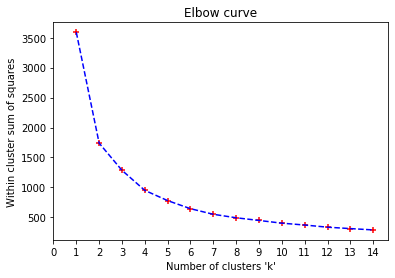

In [48]:
import matplotlib.pyplot as plt

plt.scatter(k, WCSS, marker="+", c="red")       # creating a graph between k-value and WCSS
plt.plot(k, WCSS, c="blue", linestyle='dashed') # to connect the dotted lines in the graph
plt.xlabel("Number of clusters 'k'")
plt.ylabel("Within cluster sum of squares")
plt.xticks(range(0,15,1))
plt.title("Elbow curve")

In [49]:
D = C[['YearsInCurrentRole', 'YearsAtCompany', 'BusinessTravel']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)                       
model = km.fit(D[['YearsInCurrentRole','YearsAtCompany','BusinessTravel']])
D['cluster_label'] = model.labels_

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
D.sort_values(by="cluster_label") # sorting the rows based on cluster labels or say based on centroids

,YearsInCurrentRole,YearsAtCompany,BusinessTravel,cluster_label
1234,-1.167687,-0.981014,0,0
504,-0.891589,-0.981014,1,0
501,-1.167687,-0.981014,1,0
1239,-0.063296,-0.327893,1,0
1245,-0.615492,-0.817734,1,0
...,...,...,...,...
659,-0.615492,-0.491174,2,3
661,-1.167687,-0.981014,2,3
662,-0.615492,-0.817734,2,3
642,-0.615492,-0.817734,2,3


## Hierarchical Clustering for 2 columns

In [31]:
C = B[['YearsInCurrentRole', 'YearsAtCompany']]

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4) # we can give any value here as clustering apne aap ho jayega baad me sare clusters k liye
model = hc.fit(C)
C["new_col"] = model.labels_

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


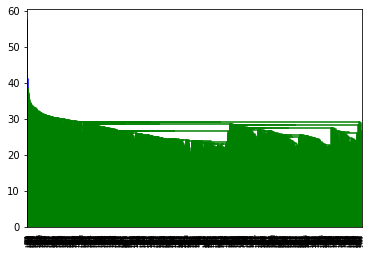

In [51]:
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix

D = pd.DataFrame(distance_matrix(C.values, C.values)) # Here, we have calculated the distance matrix in B 

linkage_matrix = linkage(D)                           # Here, we have calculated the linkage matrix
dendrogram(linkage_matrix, orientation='top')          # Here, we are creating 'dendogram' using 'linkage' matrix     


# Below portion of code is mandatory as if it is not provided then we only get co-ordinates and not below 'dendogram' diagram

import matplotlib.pyplot as plt                      
plt.show()

## Hierarchical Clustering for 3 columns

In [52]:
C = B[['YearsInCurrentRole', 'YearsAtCompany', 'BusinessTravel']]

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4) # we can give any value here as clustering apne aap ho jayega baad me sare clusters k liye
model = hc.fit(C)
C["new_col"] = model.labels_

C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C:\Users\Anoop Srivastava\anaconda3\lib\site-packages\ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


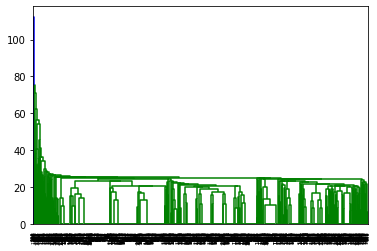

In [53]:
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix

D = pd.DataFrame(distance_matrix(C.values, C.values)) # Here, we have calculated the distance matrix in B 

linkage_matrix = linkage(D)                           # Here, we have calculated the linkage matrix
dendrogram(linkage_matrix, orientation='top')          # Here, we are creating 'dendogram' using 'linkage' matrix     


# Below portion of code is mandatory as if it is not provided then we only get co-ordinates and not below 'dendogram' diagram

import matplotlib.pyplot as plt                      
plt.show()